# Visualización xG Delta_PPDA Sergio Soler Rocha

## Introducción y Objetivo

En el fútbol moderno, el análisis de datos ha emergido como una herramienta fundamental para comprender y mejorar el rendimiento de los equipos. Entre las métricas más destacadas en este ámbito se encuentran el xG Delta (Expected Goals Delta) y el PPDA (Passes per Defensive Action), las cuales proporcionan información valiosa sobre la eficiencia ofensiva y la intensidad defensiva de los equipos, respectivamente.

- **xG Delta**: Es una métrica que compara los goles reales marcados por un equipo con los goles esperados (xG) que debería haber anotado según la calidad y cantidad de sus oportunidades de gol. Un xG Delta positivo indica que un equipo está superando las expectativas basadas en sus oportunidades, mientras que un xG Delta negativo sugiere que está anotando menos de lo esperado.

- **PPDA (Passes per Defensive Action)**: Esta métrica mide la presión defensiva de un equipo, calculando el número de pases que permite al equipo contrario por cada acción defensiva (como tackles, intercepciones, o faltas). Un PPDA bajo indica un equipo que presiona intensamente a sus oponentes, mientras que un PPDA alto puede reflejar un enfoque defensivo menos agresivo.

El objetivo de este estudio es investigar cómo estas dos métricas, xG Delta y PPDA, afectan al rendimiento general de los equipos en términos de su posición final en la clasificación. Para ello, utilizaremos datos de varias temporadas de las principales ligas europeas, realizando visualizaciones y análisis estadísticos que nos permitan identificar patrones y correlaciones significativas.

A lo largo de este análisis, nos centraremos en:
- **Comparar el xG Delta y el PPDA promedio de los equipos con su posición en la clasificación**.
- **Explorar la relación entre estas métricas y el rendimiento de los equipos a lo largo de varias temporadas**.
- **Visualizar estas relaciones mediante gráficos que incluyan regresiones lineales y representaciones tridimensionales donde corresponda**.

Con estos análisis, esperamos obtener una comprensión más profunda de cómo las estrategias ofensivas y defensivas, reflejadas en las métricas de xG Delta y PPDA, se correlacionan con el éxito en las ligas de fútbol. Este enfoque puede ser valioso tanto para entrenadores y analistas que buscan optimizar el rendimiento de sus equipos como para aficionados interesados en el análisis avanzado del juego.

# Preprocesado

In [1]:
import pandas as pd

# Cargar datos con especificación del encoding
teams = pd.read_csv('teams.csv', encoding='latin1')
teamstats = pd.read_csv('teamstats.csv', encoding='latin1')
shots = pd.read_csv('shots.csv', encoding='latin1')
players = pd.read_csv('players.csv', encoding='latin1')
leagues = pd.read_csv('leagues.csv', encoding='latin1')
games = pd.read_csv('games.csv', encoding='latin1')
appearances = pd.read_csv('appearances.csv', encoding='latin1')

## Descripción del Dataset

El análisis se basa en un conjunto de datos que incluye información detallada sobre equipos, jugadores, partidos y estadísticas avanzadas en varias ligas de fútbol europeas. Este dataset ofrece una rica fuente de información que permite estudiar el rendimiento de los equipos y jugadores a lo largo de diferentes temporadas. A continuación, se describen los diferentes archivos que componen el dataset:

### 1. `teams.csv`
Este archivo contiene la información básica sobre los equipos:
- **`teamID`**: Identificador único del equipo.
- **`name`**: Nombre del equipo.

### 2. `teamstats.csv`
Este archivo almacena estadísticas avanzadas de los equipos para cada partido:
- **`gameID`**: Identificador único del partido.
- **`teamID`**: Identificador del equipo.
- **`season`**: Temporada en la que se jugó el partido.
- **`date`**: Fecha del partido.
- **`location`**: Indica si el equipo jugó como local (h) o visitante (a).
- **`goals`**: Número de goles marcados por el equipo en el partido.
- **`xGoals`**: Goles esperados basados en la calidad y cantidad de las oportunidades.
- **`shots`**: Total de disparos realizados.
- **`shotsOnTarget`**: Total de disparos a puerta.
- **`deep`**: Número de veces que el equipo llegó a las zonas más avanzadas del campo.
- **`ppda`**: Passes per Defensive Action, métrica que mide la intensidad defensiva del equipo.
- **`fouls`**: Número de faltas cometidas.
- **`corners`**: Número de saques de esquina obtenidos.
- **`yellowCards`**: Número de tarjetas amarillas recibidas.
- **`redCards`**: Número de tarjetas rojas recibidas.
- **`result`**: Resultado del partido desde la perspectiva del equipo.

### 3. `shots.csv`
Este archivo contiene datos de los disparos realizados en los partidos:
- **`gameID`**: Identificador del partido.
- **`shooterID`**: Identificador del jugador que realizó el disparo.
- **`assisterID`**: Identificador del jugador que asistió el disparo (si aplica).
- **`minute`**: Minuto del partido en que se realizó el disparo.
- **`situation`**: Situación del disparo (juego abierto, balón parado, etc.).
- **`lastAction`**: Última acción antes del disparo (pase, regate, etc.).
- **`shotType`**: Tipo de disparo (tiro, cabezazo, etc.).
- **`shotResult`**: Resultado del disparo (gol, atajado, fuera, etc.).
- **`xGoal`**: Probabilidad de que el disparo se convirtiera en gol.
- **`positionX`**: Coordenada X de la posición del disparo en el campo.
- **`positionY`**: Coordenada Y de la posición del disparo en el campo.

### 4. `players.csv`
Este archivo incluye información sobre los jugadores:
- **`playerID`**: Identificador único del jugador.
- **`name`**: Nombre del jugador.

### 5. `leagues.csv`
Este archivo detalla la información sobre las ligas de fútbol:
- **`leagueID`**: Identificador único de la liga.
- **`name`**: Nombre de la liga.
- **`understatNotation`**: Notación utilizada por Understat para identificar la liga.

### 6. `games.csv`
Este archivo contiene datos sobre los partidos:
- **`gameID`**: Identificador único del partido.
- **`leagueID`**: Identificador de la liga en la que se jugó el partido.
- **`season`**: Temporada en la que se jugó el partido.
- **`date`**: Fecha del partido.
- **`homeTeamID`**: Identificador del equipo local.
- **`awayTeamID`**: Identificador del equipo visitante.
- **`homeGoals`**: Goles marcados por el equipo local.
- **`awayGoals`**: Goles marcados por el equipo visitante.
- **`homeProbability`**: Probabilidad de victoria del equipo local.
- **`drawProbability`**: Probabilidad de empate.
- **`awayProbability`**: Probabilidad de victoria del equipo visitante.
- **`homeGoalsHalfTime`**: Goles marcados por el equipo local en la primera mitad.
- **`awayGoalsHalfTime`**: Goles marcados por el equipo visitante en la primera mitad.
- **(varias columnas adicionales con probabilidades y cuotas de apuestas de diferentes casas)**

### 7. `appearances.csv`
Este archivo recoge los datos de las apariciones de los jugadores en los partidos:
- **`gameID`**: Identificador del partido.
- **`playerID`**: Identificador del jugador.
- **`goals`**: Goles marcados por el jugador.
- **`ownGoals`**: Goles en propia puerta.
- **`shots`**: Disparos realizados por el jugador.
- **`xGoals`**: Goles esperados para el jugador.
- **`xGoalsChain`**: Contribución del jugador al xG en toda la secuencia de juego.
- **`xGoalsBuildup`**: Contribución del jugador al xG en la construcción de la jugada.
- **`assists`**: Asistencias del jugador.
- **`keyPasses`**: Pases clave realizados.
- **`xAssists`**: Asistencias esperadas.
- **`position`**: Posición del jugador en el campo.
- **`positionOrder`**: Orden de la posición del jugador.
- **`yellowCard`**: Indica si el jugador recibió tarjeta amarilla.
- **`redCard`**: Indica si el jugador recibió tarjeta roja.
- **`time`**: Minutos jugados.
- **`substituteIn`**: Minuto en que el jugador ingresó como sustituto.
- **`substituteOut`**: Minuto en que el jugador fue sustituido.
- **`leagueID`**: Identificador de la liga en la que se jugó el partido.


## 1- Tratamiento de Valores Nulos

Primero, identificamos los valores nulos en cada DataFrame y decidimos cómo manejarlos (rellenarlos, eliminarlos o imputarlos).

In [2]:
# Identificar valores nulos
print(teams.isnull().sum())


teamID    0
name      0
dtype: int64


In [3]:
print(teamstats.isnull().sum())

gameID           0
teamID           0
season           0
date             0
location         0
goals            0
xGoals           0
shots            0
shotsOnTarget    0
deep             0
ppda             0
fouls            0
corners          0
yellowCards      1
redCards         0
result           0
dtype: int64


Para la columna **yellowCards** en la tabla teamstats, donde hay un valor nulo, podemos rellenar el valor faltante con la mediana de la columna. La mediana es una buena opción en este caso porque no se ve afectada por valores atípicos como lo haría la media, proporcionando un valor representativo de la distribución central de los datos.

In [4]:
# Calcular la mediana de la columna yellowCards
median_yellow_cards = teamstats['yellowCards'].median()

# Rellenar el valor nulo con la mediana
teamstats['yellowCards'].fillna(median_yellow_cards, inplace=True)

# Verificar que los valores nulos han sido tratados
print(teamstats['yellowCards'].isnull().sum())

0


In [5]:
print(shots.isnull().sum())

gameID            0
shooterID         0
assisterID    84344
minute            0
situation         0
lastAction    36896
shotType          0
shotResult        0
xGoal             0
positionX         0
positionY         0
dtype: int64


**assisterID** Rellenar con un Valor Indicativo: Rellenar los valores nulos con un valor específico que indique claramente que no hubo asistente. Por ejemplo, podemos usar un ID especial como -1 o 0 para indicar que no hubo asistente. Para este análisis específico, la opción de rellenar con un valor indicativo es generalmente preferible, ya que permite conservar toda la información mientras se hace explícito que no hubo asistente.

In [6]:
# Rellenar valores nulos en assisterID con -1 para indicar que no hubo asistente
shots['assisterID'].fillna(-1, inplace=True)

# Verificar que los valores nulos han sido tratados
print(shots['assisterID'].isnull().sum())

0


Para la columna **lastAction** en la tabla shots, los valores nulos también necesitan ser manejados de manera adecuada. En este caso, podemos asumir que los valores nulos significan que no se registró ninguna acción específica antes del tiro. Podemos rellenar estos valores nulos con "None", que es uno de los valores posibles y refleja adecuadamente la ausencia de una acción específica.

In [7]:
# Rellenar valores nulos en lastAction con 'None' para indicar que no hubo una acción específica
shots['lastAction'].fillna('None', inplace=True)

# Verificar que los valores nulos han sido tratados
print(shots['lastAction'].isnull().sum())

0


In [8]:
print(players.isnull().sum())

playerID    0
name        0
dtype: int64


In [9]:
print(leagues.isnull().sum())

leagueID             0
name                 0
understatNotation    0
dtype: int64


In [10]:
print(games.isnull().sum())

gameID                0
leagueID              0
season                0
date                  0
homeTeamID            0
awayTeamID            0
homeGoals             0
awayGoals             0
homeProbability       0
drawProbability       0
awayProbability       0
homeGoalsHalfTime     0
awayGoalsHalfTime     0
B365H                 5
B365D                 5
B365A                 5
BWH                   3
BWD                   3
BWA                   3
IWH                  18
IWD                  18
IWA                  18
PSH                  20
PSD                  20
PSA                  20
WHH                   6
WHD                   6
WHA                   6
VCH                   4
VCD                   4
VCA                   4
PSCH                  2
PSCD                  2
PSCA                  2
dtype: int64


En este caso vamos a eliminar las columnas que tienen valores nulos, ya que, serán irrelevantes en el estudio

In [11]:
# Eliminar columnas con valores nulos en el DataFrame 'games'
games = games.dropna(axis=1)

# Verificar las columnas restantes
print(games.columns)

Index(['gameID', 'leagueID', 'season', 'date', 'homeTeamID', 'awayTeamID',
       'homeGoals', 'awayGoals', 'homeProbability', 'drawProbability',
       'awayProbability', 'homeGoalsHalfTime', 'awayGoalsHalfTime'],
      dtype='object')


In [12]:
print(appearances.isnull().sum())

gameID           0
playerID         0
goals            0
ownGoals         0
shots            0
xGoals           0
xGoalsChain      0
xGoalsBuildup    0
assists          0
keyPasses        0
xAssists         0
position         0
positionOrder    0
yellowCard       0
redCard          0
time             0
substituteIn     0
substituteOut    0
leagueID         0
dtype: int64


In [13]:
# Calcular el xG Delta en el DataFrame shots
shots['xg_delta'] = shots.apply(
    lambda row: 1 - row['xGoal'] if row['shotResult'] == 'Goal' else -row['xGoal'],
    axis=1
)


# Procesado y Análisis

## Rendimiento en términos absolutos a lo largo de las temporadas
Aunque inicialmente no estaba previsto dentro de los objetivos marcados para este estudio y visualización, finalmente decidí incluir este apartado porque, al explorar diversas visualizaciones, me di cuenta de la importancia de analizar las métricas mencionadas en el apartado de objetivos. Fue precisamente al experimentar con estas visualizaciones que surgió la idea central de este estudio. En otras palabras, este proceso de exploración visual no solo complementó el análisis, sino que fue el catalizador que dio origen a la propia estructura y enfoque del estudio.

### 1. Análisis de Goles a lo largo de las Temporadas
Por ser el gol el elemento central y la culminación de todo esfuerzo en el fútbol, decidí iniciar este estudio con un simple análisis de los goles a lo largo de las temporadas. Comprender la distribución y evolución de los goles es fundamental para desentrañar las dinámicas del juego y evaluar el rendimiento de los equipos.

In [14]:
# Aprupar el promedio de goles por partido por temporada
goals_per_season = teamstats.groupby('season')['goals'].mean().reset_index()

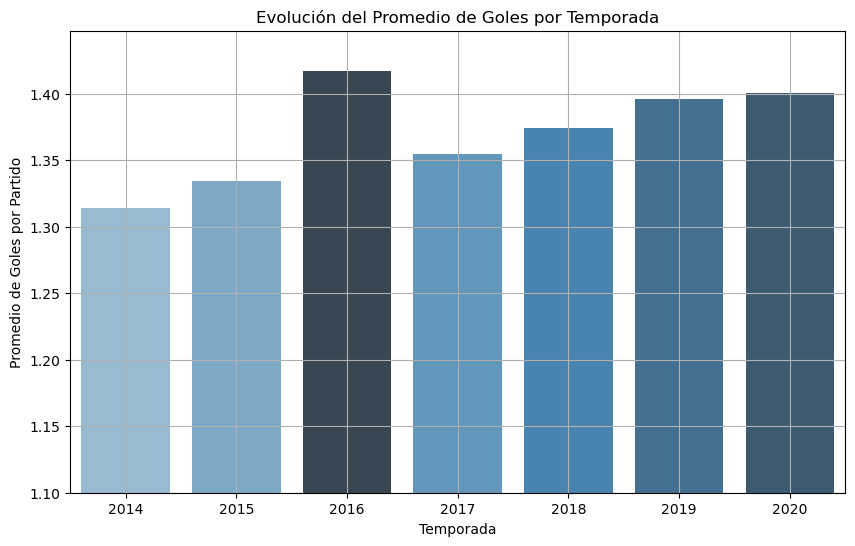

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Usamos la altura de las barras para determinar la intensidad del color
palette = sns.color_palette("Blues_d", len(goals_per_season))
rank = goals_per_season['goals'].argsort().argsort()  # Ordenar por la altura de las barras

sns.barplot(data=goals_per_season, x='season', y='goals', palette=[palette[i] for i in rank])
plt.title('Evolución del Promedio de Goles por Temporada')
plt.xlabel('Temporada')
plt.ylabel('Promedio de Goles por Partido')

# Ajustar los límites del eje y
plt.ylim(1.1, goals_per_season['goals'].max() + 0.03)

plt.grid(True)
plt.show()

### 2- Promedio de Goles con y sin Asistencia por Temporada
La asistencia es una métrica fundamental en el análisis del rendimiento de los jugadores y equipos, ya que mide la participación directa en la creación de goles.

Para visualizar el promedio de goles con y sin asistencia por temporada, se realizaron las siguientes transformaciones sobre los datos originales. Primero, se calcularon los promedios de goles asistidos y no asistidos por temporada. Posteriormente, ambos conjuntos de datos fueron combinados en un único DataFrame que permite la comparación directa entre estas dos categorías.

In [16]:
# Filtrar disparos que resultaron en goles y no tuvieron asistencia
shots_no_assist = shots[(shots['shotResult'] == 'Goal') & (shots['assisterID'] == -1)]

# Unir los datos de disparos sin asistencia con las temporadas de los partidos
shots_no_assist = shots_no_assist.merge(games[['gameID', 'season']], on='gameID', how='left')

# Calcular el número de goles sin asistencia por temporada
goals_no_assist_per_season = shots_no_assist.groupby('season')['gameID'].count().reset_index()
goals_no_assist_per_season.columns = ['season', 'no_assist_goals']

# Calcular el número de partidos por temporada para normalizar
games_per_season = games.groupby('season')['gameID'].count().reset_index()
games_per_season.columns = ['season', 'num_games']

# Calcular el promedio de goles sin asistencia por partido
goals_no_assist_per_season = goals_no_assist_per_season.merge(games_per_season, on='season')
goals_no_assist_per_season['avg_no_assist_goals'] = goals_no_assist_per_season['no_assist_goals'] / goals_no_assist_per_season['num_games']

In [17]:
# Filtrar disparos que resultaron en goles y tuvieron asistencia
shots_with_assist = shots[(shots['shotResult'] == 'Goal') & (shots['assisterID'] != -1)]

# Unir los datos de disparos con asistencia con las temporadas de los partidos
shots_with_assist = shots_with_assist.merge(games[['gameID', 'season']], on='gameID', how='left')

# Calcular el número de goles con asistencia por temporada
goals_with_assist_per_season = shots_with_assist.groupby('season')['gameID'].count().reset_index()
goals_with_assist_per_season.columns = ['season', 'with_assist_goals']

# Calcular el número de partidos por temporada para normalizar (opcional)
games_per_season = games.groupby('season')['gameID'].count().reset_index()
games_per_season.columns = ['season', 'num_games']

# Calcular el promedio de goles con asistencia por partido
goals_with_assist_per_season = goals_with_assist_per_season.merge(games_per_season, on='season')
goals_with_assist_per_season['avg_with_assist_goals'] = goals_with_assist_per_season['with_assist_goals'] / goals_with_assist_per_season['num_games']

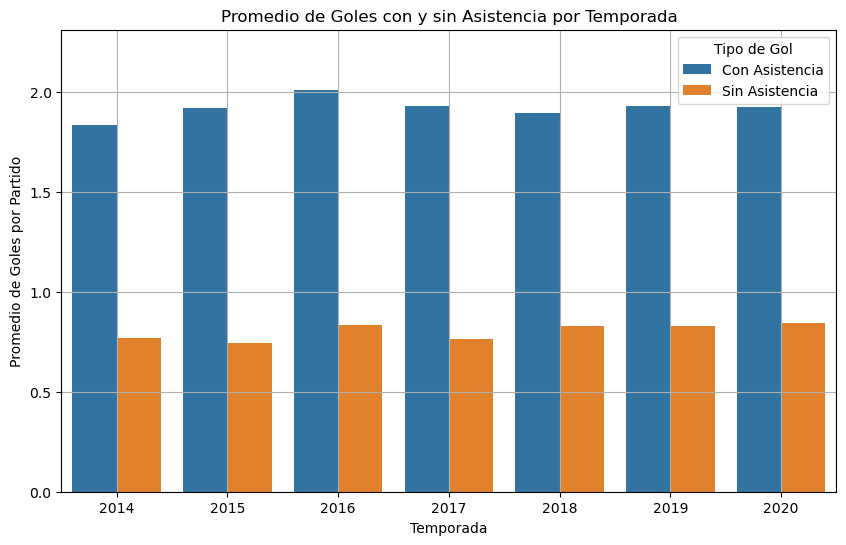

In [18]:
# Preparar datos para gráfico de barras apiladas
goals_no_assist_per_season['type'] = 'Sin Asistencia'
goals_with_assist_per_season['type'] = 'Con Asistencia'

# Combinando ambos conjuntos de datos
goals_combined = pd.concat([goals_with_assist_per_season[['season', 'avg_with_assist_goals']].rename(columns={'avg_with_assist_goals': 'avg_goals'}), 
                            goals_no_assist_per_season[['season', 'avg_no_assist_goals']].rename(columns={'avg_no_assist_goals': 'avg_goals'})])
goals_combined['type'] = ['Con Asistencia'] * len(goals_with_assist_per_season) + ['Sin Asistencia'] * len(goals_no_assist_per_season)

# Gráfico de barras apiladas
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='avg_goals', hue='type', data=goals_combined)
plt.title('Promedio de Goles con y sin Asistencia por Temporada')
plt.xlabel('Temporada')
plt.ylabel('Promedio de Goles por Partido')
plt.legend(title='Tipo de Gol')
plt.grid(True)
plt.ylim(0,2.31)
plt.show()

### 3- Análisis de Empates
l empate es probablemente el resultado menos preferido por los aficionados, ya que deja la sensación de una resolución incompleta. En un deporte donde la emoción es conducida por la victoria o la derrota, el empate, especialmente sin goles, puede resultar insatisfactorio para aquellos que esperan un desenlace más decisivo.
#### 3.1 Probabilidad de Empate según el Número Total de Goles en un Partido
Para analizar cómo la probabilidad de empate varía en función del número total de goles anotados en un partido, se realizaron las siguientes transformaciones: primero, se calculó el número total de goles por partido sumando los goles anotados por ambos equipos. Luego, se identificaron los partidos que terminaron en empate y se calculó la probabilidad de empate para cada número total de goles. Finalmente, se utilizó un gráfico de barras para visualizar estos datos, donde la intensidad del color es proporcional a la probabilidad de empate. Este enfoque facilita la observación de que a medida que se marcan más goles, la probabilidad de que un partido termine en empate disminuye significativamente.

In [19]:
# Calcular el número total de goles por partido
games['total_goals'] = games['homeGoals'] + games['awayGoals']

# Identificar empates
games['draw'] = games.apply(lambda row: 1 if row['homeGoals'] == row['awayGoals'] else 0, axis=1)

# Calcular el número de partidos y empates para cada número de goles
goals_distribution = games.groupby('total_goals')['draw'].agg(['count', 'sum']).reset_index()
goals_distribution.columns = ['total_goals', 'total_games', 'total_draws']

# Calcular la probabilidad de empate para cada número de goles
goals_distribution['draw_probability'] = goals_distribution['total_draws'] / goals_distribution['total_games']


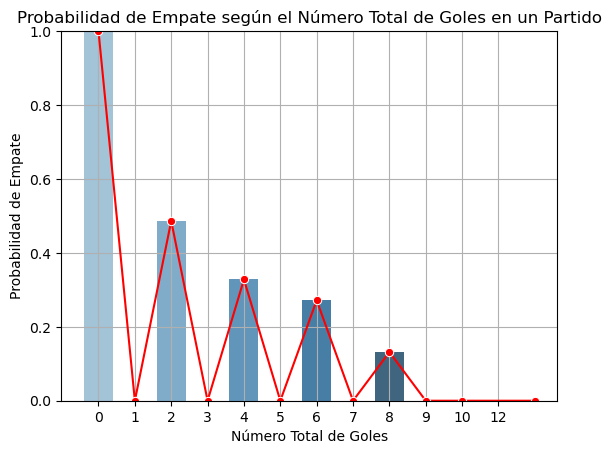

In [20]:
# Gráfico de barras
sns.barplot(data=goals_distribution, x='total_goals', y='draw_probability', palette='Blues_d')

# Línea de tendencia
sns.lineplot(data=goals_distribution, x='total_goals', y='draw_probability', marker='o', color='red')

plt.title('Probabilidad de Empate según el Número Total de Goles en un Partido')
plt.xlabel('Número Total de Goles')
plt.ylabel('Probabilidad de Empate')
plt.ylim(0, 1)  # Escala de probabilidad de 0 a 1
plt.grid(True)
plt.show()

#### 3.2 Porcentaje de Empates por Temporada

In [21]:
# Calcular el promedio de empates por temporada
draws_per_season = games.groupby('season')['draw'].mean().reset_index()
draws_per_season.columns = ['season', 'avg_draws']

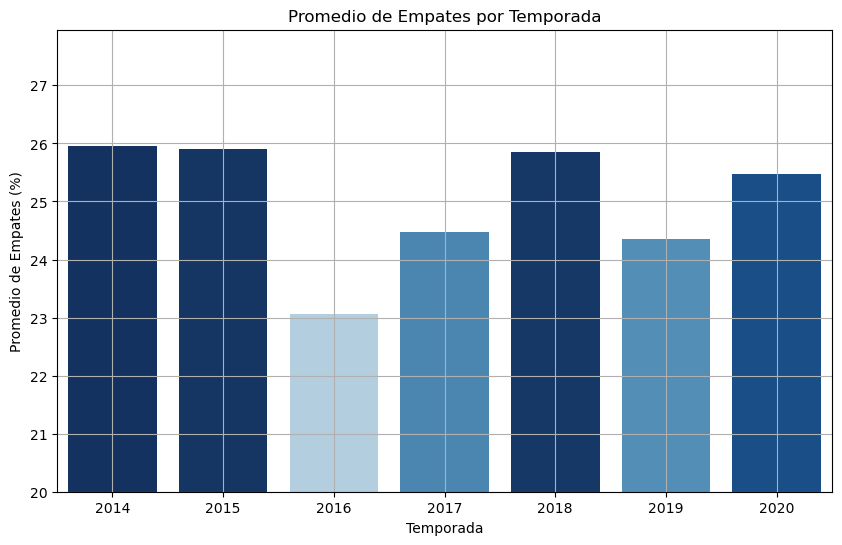

In [22]:
# Convertir 'avg_draws' a porcentaje
draws_per_season['avg_draws_percent'] = draws_per_season['avg_draws'] * 100

# Calcular los colores proporcionales a la altura de las barras en porcentaje
min_val = draws_per_season['avg_draws_percent'].min()
max_val = draws_per_season['avg_draws_percent'].max()
adjusted_min = min_val - (max_val - min_val) * 0.5  # Ajustar el mínimo para ampliar el rango de colores

norm = plt.Normalize(adjusted_min, max_val)
sm = plt.cm.ScalarMappable(cmap="Blues", norm=norm)
sm.set_array([])

# Asignar colores a cada barra en función de su altura (en porcentaje)
colors = [sm.to_rgba(v) for v in draws_per_season['avg_draws_percent']]

plt.figure(figsize=(10, 6))
sns.barplot(data=draws_per_season, x='season', y='avg_draws_percent', palette=colors)
plt.title('Promedio de Empates por Temporada')
plt.xlabel('Temporada')
plt.ylabel('Promedio de Empates (%)')
plt.ylim(20, max_val + 2)  # Ajusta el límite superior si lo deseas
plt.grid(True)

# Omitir la barra de color comentando la siguiente línea si no se necesita
# plt.colorbar(sm)

plt.show()

#### 3.3 Porcentaje de Empates a 0 por Temporada

In [23]:
# Identificar los partidos que terminaron en empate 0-0
games['draw_0_0'] = games.apply(lambda row: 1 if row['homeGoals'] == 0 and row['awayGoals'] == 0 else 0, axis=1)

# Calcular el número total de partidos y el número de empates 0-0 por temporada
draw_0_0_per_season = games.groupby('season').agg(total_games=('gameID', 'count'), total_draw_0_0=('draw_0_0', 'sum')).reset_index()

# Calcular el porcentaje de partidos 0-0 por temporada
draw_0_0_per_season['percentage_draw_0_0'] = (draw_0_0_per_season['total_draw_0_0'] / draw_0_0_per_season['total_games']) * 100



C:\Users\soler\AppData\Local\Temp\ipykernel_16812\2737585510.py:23: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


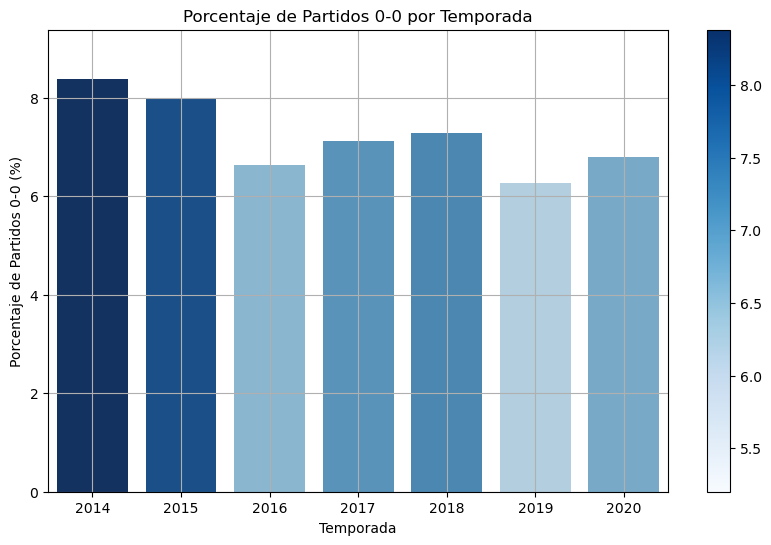

In [24]:
# Ajustar la normalización para mejorar la visibilidad de las barras más pequeñas
min_val = draw_0_0_per_season['percentage_draw_0_0'].min()
max_val = draw_0_0_per_season['percentage_draw_0_0'].max()
adjusted_min = min_val - (max_val - min_val) * 0.5  # Ajustar el mínimo para ampliar el rango de colores

# Calcular los colores proporcionales a la altura de las barras con el rango ajustado
norm = plt.Normalize(adjusted_min, max_val)
sm = plt.cm.ScalarMappable(cmap="Blues", norm=norm)
sm.set_array([])

# Asignar colores a cada barra en función de su altura con el rango ajustado
colors = [sm.to_rgba(v) for v in draw_0_0_per_season['percentage_draw_0_0']]

plt.figure(figsize=(10, 6))
sns.barplot(data=draw_0_0_per_season, x='season', y='percentage_draw_0_0', palette=colors)
plt.title('Porcentaje de Partidos 0-0 por Temporada')
plt.xlabel('Temporada')
plt.ylabel('Porcentaje de Partidos 0-0 (%)')
plt.ylim(0, max_val + 1)  # Ajustar el límite superior
plt.grid(True)

# Añadir una barra de color para referencia
plt.colorbar(sm)
plt.show()

Después de visualizar las gráficas anteriores, llegué a la conclusión de que, en términos generales, la temporada 2016 fue un buen año en cuanto a la cantidad de goles y la baja cantidad de empates en comparación con otras temporadas. Esto me motivó a analizar más métricas a lo largo de las temporadas, como el promedio de faltas, corners, tarjetas, entre otras. Sin embargo, no he incluido estos análisis en el informe, ya que se desvían de los objetivos principales y podrían diluir el enfoque central del estudio.

### 4- Análisis de xGoals (xG Delta)

In [25]:
# Calcular el promedio de xGoals y Goles por temporada
xg_vs_goals_per_season = teamstats.groupby('season').agg(avg_xg=('xGoals', 'mean'), avg_goals=('goals', 'mean')).reset_index()

# Calcular el xG Delta por temporada
xg_vs_goals_per_season['xg_delta'] = xg_vs_goals_per_season['avg_goals'] - xg_vs_goals_per_season['avg_xg']

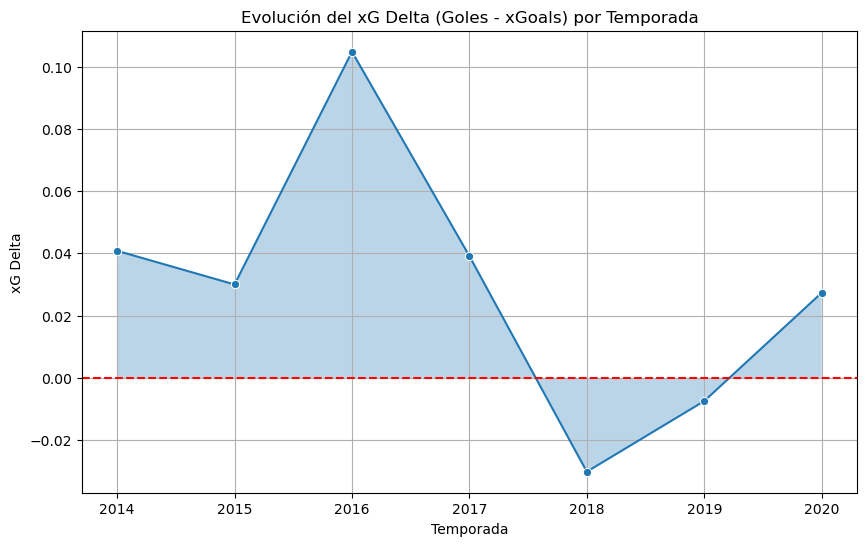

In [26]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=xg_vs_goals_per_season, x='season', y='xg_delta', marker='o')
plt.fill_between(xg_vs_goals_per_season['season'], xg_vs_goals_per_season['xg_delta'], alpha=0.3)
plt.title('Evolución del xG Delta (Goles - xGoals) por Temporada')
plt.xlabel('Temporada')
plt.ylabel('xG Delta')
plt.axhline(0, color='red', linestyle='--')
plt.grid(True)
plt.show()

Fue con esta gráfica (y con la siguiente) donde surgió el objetivo del presente trabajo. Anteriormente, había concluido que la temporada 2016 fue destacada en comparación con las otras analizadas, tanto en términos de goles como de bajos índices de empates. Entonces, al observar que en la temporada 2016 se registra el pico más alto del xG Delta, me surgió la pregunta: ¿Cómo afecta esta métrica, que no es muy conocida entre el gran público, al rendimiento de los clubes en una temporada? Al investigar, encontré artículos que explicaban en qué consiste la métrica, pero no un análisis detallado y visualmente claro que respondiera a mi inquietud. Por ello, decidí enfocarme en esta tarea.

### 5- Análisis de PPDA (Passes per Defensive Action) por temporada

In [27]:
# Calcular el promedio de 'ppda' por temporada
ppda_per_season = teamstats.groupby('season')['ppda'].mean().reset_index()
ppda_per_season.columns = ['season', 'avg_ppda']


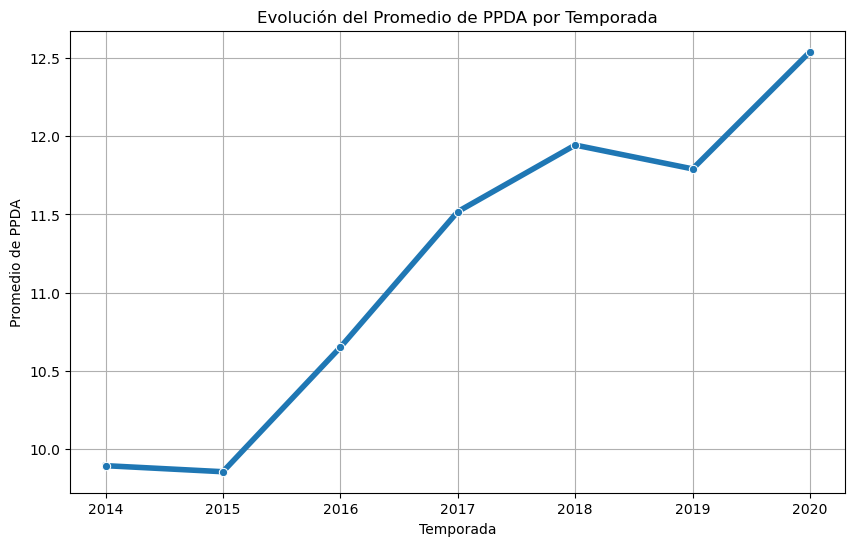

In [28]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=ppda_per_season, x='season', y='avg_ppda', marker='o', linewidth=4)
plt.title('Evolución del Promedio de PPDA por Temporada')
plt.xlabel('Temporada')
plt.ylabel('Promedio de PPDA')
plt.grid(True)
plt.show()

En este caso, al observar la clara tendencia ascendente del promedio de PPDA por temporada, me surgió la misma pregunta que anteriormente: ¿Existe alguna relación entre el rendimiento de los equipos en una temporada y la métrica PPDA? ¿Hay también una relación con la métrica xG Delta? ¿Cómo pueden ambas influir en el rendimiento?

## Comprendiendo al xGoal delta
### 1. Comprobación de la Eficiencia del Modelo de xG
Para evaluar la precisión del modelo que genera los datos de xG, se calculó el xG Delta, que mide la diferencia entre la probabilidad de gol asignada por el modelo y el resultado real (gol o no gol). 
	
Con el fin de visualizar cómo se comporta el modelo a lo largo del campo, se creó un heatmap que muestra el promedio de xG Delta en diferentes zonas del terreno de juego. Se dividió el campo en una cuadrícula (en este caso, de 20x20 celdas), y se calculó el promedio de xG Delta para los disparos realizados dentro de un radio específico en cada celda. Este análisis permite identificar áreas del campo donde el modelo de xG tiende a ser más optimista o pesimista en sus predicciones.

In [29]:
shots['xg_delta'] = shots['shotResult'].apply(lambda result: 1 if result == 'Goal' else 0) - shots['xGoal']

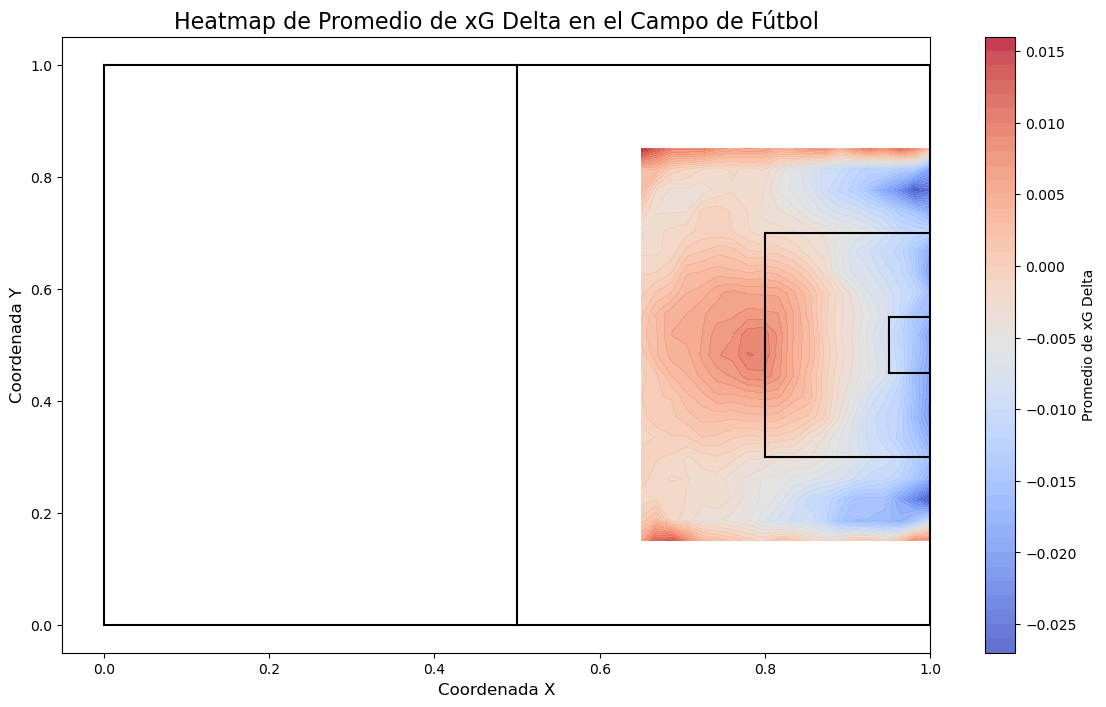

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import cKDTree

# Definir la cuadrícula del campo (por ejemplo, 20x20)
grid_x, grid_y = np.mgrid[0.65:1:20j, 0.15:0.85:20j]  # 20 puntos en el eje X y 20 en el eje Y
grid_points = np.vstack([grid_x.ravel(), grid_y.ravel()]).T

# Crear un árbol KD para buscar los puntos dentro de un radio específico
tree = cKDTree(np.vstack([shots['positionX'], shots['positionY']]).T)

# Definir el radio para incluir disparos alrededor de cada punto de la malla
radius = 0.1  # ajustar este valor para cambiar el área de influencia

# Calcular el promedio de xG Delta en cada celda de la malla
avg_xg_delta_grid = []
for point in grid_points:
    indices = tree.query_ball_point(point, r=radius)
    if len(indices) > 0:
        avg_xg_delta = np.mean(shots['xg_delta'].iloc[indices])
        avg_xg_delta_grid.append(avg_xg_delta)
    else:
        avg_xg_delta_grid.append(np.nan)  # En caso de no haber disparos en el radio

# Convertir la lista a un array de la misma forma que la malla
avg_xg_delta_grid = np.array(avg_xg_delta_grid).reshape(grid_x.shape)



# Crear el heatmap del campo
plt.figure(figsize=(14, 8))
plt.contourf(grid_x, grid_y, avg_xg_delta_grid, cmap='coolwarm', levels=50, alpha=0.8)
plt.colorbar(label='Promedio de xG Delta')

# Dibujar el campo de fútbol adaptado a coordenadas de 0 a 1
plt.plot([0, 1], [0, 0], color="black")       # Línea de fondo inferior
plt.plot([0, 1], [1, 1], color="black")       # Línea de fondo superior
plt.plot([0, 0], [0, 1], color="black")       # Línea lateral izquierda
plt.plot([1, 1], [0, 1], color="black")       # Línea lateral derecha
plt.plot([0.5, 0.5], [0, 1], color="black")   # Línea media


# Porterias
plt.plot([0.95, 1], [0.45, 0.45], color="black")
plt.plot([0.95, 1], [0.55, 0.55], color="black")
plt.plot([0.95, 0.95], [0.45, 0.55], color="black")

# Zona del penalti
plt.plot([0.8, 1], [0.3, 0.3], color="black")
plt.plot([0.8, 1], [0.7, 0.7], color="black")
plt.plot([0.8, 0.8], [0.3, 0.7], color="black")

# Título y etiquetas
plt.title('Heatmap de Promedio de xG Delta en el Campo de Fútbol', fontsize=16)
plt.xlabel('Coordenada X', fontsize=12)
plt.ylabel('Coordenada Y', fontsize=12)

plt.grid(False)
plt.show()


### 2. Visualización del xG Delta en un Campo de Fútbol
Para entender mejor el concepto del xG Delta, se visualizó esta métrica en el contexto espacial de un campo de fútbol. Se seleccionó un partido aleatorio y se representaron los disparos realizados por el equipo local en ese juego. Los disparos se posicionaron en el campo de acuerdo con las coordenadas (X, Y) y se colorearon en función de su xG Delta, lo que permite identificar visualmente las oportunidades de gol que superaron o no las expectativas.

In [31]:
# Realizar el merge entre shots y games basándonos en gameID
shots_games = pd.merge(shots, games[['gameID', 'homeTeamID', 'awayTeamID']], on='gameID', how='left')

# Seleccionar un gameID aleatorio
random_game_id = np.random.choice(shots_games['gameID'].unique())

# Filtrar los disparos del equipo local en ese partido
home_team_id = shots_games.loc[shots_games['gameID'] == random_game_id, 'homeTeamID'].values[0]

# Filtrar los disparos del equipo local
shots_home_team = shots_games[(shots_games['gameID'] == random_game_id) & (shots_games['homeTeamID'] == home_team_id)]






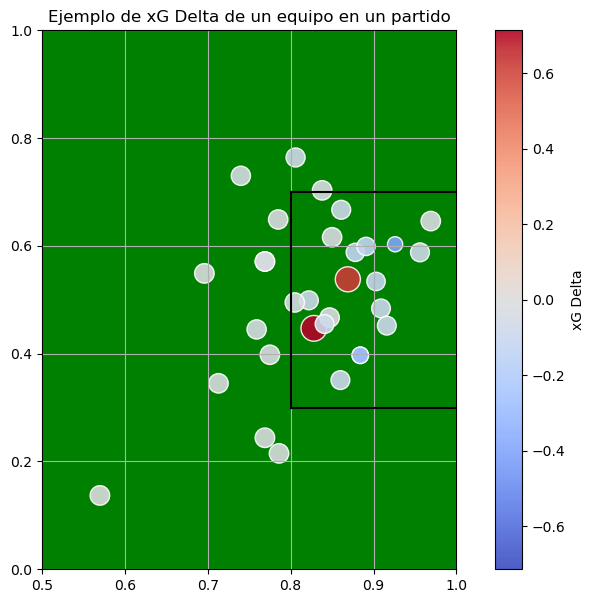

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Definir los límites de la barra de color para centrar el 0
vmin = min(shots_home_team['xg_delta'].min(), -shots_home_team['xg_delta'].max())
vmax = max(shots_home_team['xg_delta'].max(), -shots_home_team['xg_delta'].min())

plt.figure(figsize=(10, 7))
# Usar un scatterplot para visualizar los disparos
sc = plt.scatter(
    x=shots_home_team['positionX'], 
    y=shots_home_team['positionY'], 
    c=shots_home_team['xg_delta'], 
    s=shots_home_team['xg_delta'] * 200 + 200,  # Ajustar tamaño de las burbujas
    cmap='coolwarm', 
    alpha=0.9, 
    edgecolor='w',
    vmin=vmin,  # Mínimo valor para la escala de color
    vmax=vmax   # Máximo valor para la escala de color
)

# Añadir barra de color (colorbar)
plt.colorbar(sc, label='xG Delta')

# Zona del penalti
plt.plot([0.8, 1], [0.3, 0.3], color="black")
plt.plot([0.8, 1], [0.7, 0.7], color="black")
plt.plot([0.8, 0.8], [0.3, 0.7], color="black")

# Configurar el fondo del gráfico a verde claro
plt.gca().set_facecolor('green')  # Código de color para un verde claro

# Ajustar la relación de aspecto para reflejar las proporciones del campo de fútbol
plt.gca().set_aspect(0.65)  # Relación de aspecto del campo (ancho/largo)

# Configuración adicional
plt.title(f'Ejemplo de xG Delta de un equipo en un partido')
#plt.xlabel('Posición X en el Campo')
#plt.ylabel('Posición Y en el Campo')
plt.xlim(0.5, 1)  # Si deseas enfocarte en una zona específica del campo
plt.ylim(0, 1)
plt.grid(True)

# Mostrar gráfico
plt.show()


## Entendiendo el Impacto del xG Delta y PPDA en el Rendimiento de los Equipos
### 1- Top 5 mejores Xg Delta y evolución por temporada
En este análisis, se calculó el promedio total del xG Delta de los equipos para identificar a los cinco equipos con el mejor rendimiento en esta métrica. Posteriormente, se examinó la evolución de su xG Delta a lo largo de las temporadas y se comparó con sus posiciones en la clasificación de la liga.

In [33]:
# Calcular el xG Delta total por equipo
teamstats['xg_delta'] = teamstats['goals'] - teamstats['xGoals']

# Calcular el promedio de xG Delta por equipo
avg_xg_delta_per_team = teamstats.groupby('teamID')['xg_delta'].mean().reset_index()

# Obtener los nombres de los equipos
avg_xg_delta_per_team = avg_xg_delta_per_team.merge(teams[['teamID', 'name']], on='teamID')

# Ordenar los equipos por promedio de xG Delta en orden descendente
top_5_teams = avg_xg_delta_per_team.sort_values('xg_delta', ascending=False).head(5)

print(top_5_teams)


    teamID  xg_delta           name
46     117  0.307859  Bayern Munich
27      98  0.229848       Juventus
11      82  0.228471      Tottenham
77     148  0.218555      Barcelona
79     150  0.202042    Real Madrid


In [34]:
# Calcular el xG Delta por equipo y temporada
avg_xg_delta_per_season = teamstats.groupby(['teamID', 'season'])['xg_delta'].mean().reset_index()

# Obtener los nombres de los equipos
avg_xg_delta_per_season = avg_xg_delta_per_season.merge(teams[['teamID', 'name']], on='teamID')

In [35]:
import pandas as pd

# Crear un diccionario con la posición de cada equipo en cada temporada
positions = {
    'Barcelona': [1, 1, 2, 1, 1, 2, 3],
    'Real Madrid': [2, 2, 1, 3, 3, 1, 2],
    'Bayern Munich': [1, 1, 1, 1, 1, 1, 1],
    'Juventus': [1, 1, 1, 1, 1, 1, 4],
    'Tottenham': [5, 3, 2, 3, 4, 6, 7]
}
seasons = ['2014', '2015', '2016', '2017', '2018', '2019', '2020']

# Crear un DataFrame con las posiciones
positions_df = pd.DataFrame(positions, index=seasons).reset_index()
positions_df = positions_df.melt(id_vars=['index'], var_name='name', value_name='position')
positions_df.rename(columns={'index': 'season'}, inplace=True)

# Verificar el DataFrame de posiciones
print(positions_df)


   season           name  position
0    2014      Barcelona         1
1    2015      Barcelona         1
2    2016      Barcelona         2
3    2017      Barcelona         1
4    2018      Barcelona         1
5    2019      Barcelona         2
6    2020      Barcelona         3
7    2014    Real Madrid         2
8    2015    Real Madrid         2
9    2016    Real Madrid         1
10   2017    Real Madrid         3
11   2018    Real Madrid         3
12   2019    Real Madrid         1
13   2020    Real Madrid         2
14   2014  Bayern Munich         1
15   2015  Bayern Munich         1
16   2016  Bayern Munich         1
17   2017  Bayern Munich         1
18   2018  Bayern Munich         1
19   2019  Bayern Munich         1
20   2020  Bayern Munich         1
21   2014       Juventus         1
22   2015       Juventus         1
23   2016       Juventus         1
24   2017       Juventus         1
25   2018       Juventus         1
26   2019       Juventus         1
27   2020       Juve

In [36]:
# Asegurar de que las columnas 'season' sean del mismo tipo de datos (str)
avg_xg_delta_per_season['season'] = avg_xg_delta_per_season['season'].astype(str)
positions_df['season'] = positions_df['season'].astype(str)

# Verificar los tipos de datos
print(avg_xg_delta_per_season.dtypes)
print(positions_df.dtypes)



teamID        int64
season       object
xg_delta    float64
name         object
dtype: object
season      object
name        object
position     int64
dtype: object


In [37]:
# Unir las posiciones con los datos de xG Delta por temporada
avg_xg_delta_per_season_with_positions = avg_xg_delta_per_season.merge(positions_df, on=['season', 'name'], how='left')



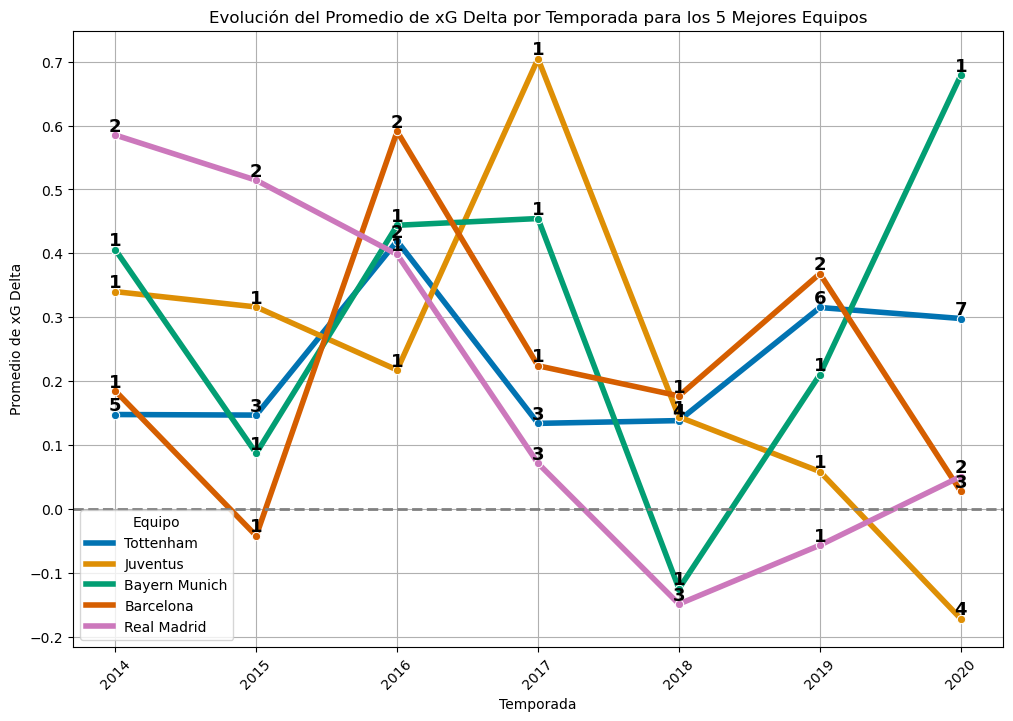

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

# Filtrar los datos para incluir solo los equipos del Top 5
top_5_names = top_5_teams['name'].tolist()  # Obtener los nombres de los equipos Top 5
filtered_df = avg_xg_delta_per_season_with_positions[avg_xg_delta_per_season_with_positions['name'].isin(top_5_names)]

# Configurar la paleta de colores para daltónicos
sns.set_palette("colorblind")

# Crear el gráfico de líneas para cada equipo con mayor grosor de línea
plt.figure(figsize=(12, 8))
lineplot = sns.lineplot(data=filtered_df, x='season', y='xg_delta', hue='name', marker='o', linewidth=4)

# Añadir una línea discontinua en el nivel 0 del eje Y
plt.axhline(0, color='gray', linestyle='--', linewidth=2)

# Añadir los números de la posición sobre los puntos correspondientes
for i, row in filtered_df.iterrows():
    plt.text(x=row['season'], y=row['xg_delta'], s=str(int(row['position'])),  # Convertir la posición en entero
             color='black', ha='center', va='bottom', fontsize=13, fontweight='bold')  # Aumentar fontsize

# Configuraciones adicionales del gráfico
plt.title('Evolución del Promedio de xG Delta por Temporada para los 5 Mejores Equipos')
plt.xlabel('Temporada')
plt.ylabel('Promedio de xG Delta')
plt.grid(True)
plt.xticks(rotation=45)

# Ajustar el eje Y para que solo muestre enteros
ax = plt.gca()
ax.yaxis.set_major_locator(mticker.MaxNLocator(integer=True))  # Asegura que el eje y tenga solo enteros

# Aumentar el grosor de las líneas en la leyenda
plt.legend(title='Equipo')
for line in lineplot.legend_.get_lines():
    line.set_linewidth(4)

# Mostrar el gráfico
plt.show()





### 2- Top 5 peores Xg Delta y evolución por temporada

In [39]:
# Calcular el xG Delta total por equipo
teamstats['xg_delta'] = teamstats['goals'] - teamstats['xGoals']

# Calcular el promedio de xG Delta por equipo
avg_xg_delta_per_team = teamstats.groupby('teamID')['xg_delta'].mean().reset_index()

# Obtener los nombres de los equipos
avg_xg_delta_per_team = avg_xg_delta_per_team.merge(teams[['teamID', 'name']], on='teamID')

# Ordenar los equipos por promedio de xG Delta en orden descendente
top_5_teams = avg_xg_delta_per_team.sort_values('xg_delta', ascending=True).head(5)

print(top_5_teams)

     teamID  xg_delta              name
128     228 -0.298384            Fulham
134     234 -0.275640         Nuernberg
136     238 -0.262774  Sheffield United
55      126 -0.243156        Ingolstadt
140     242 -0.217074           Brescia


### 3- Evolución del Promedio de PPDA por Temporada para los 5 Equipos con el PPDA más Bajo
En esta sección se presenta la evolución del promedio de PPDA (Passes per Defensive Action) por temporada para los cinco equipos que registraron los valores más bajos en esta métrica. El gráfico nos permite observar cómo estos equipos han desempeñado en términos defensivos a lo largo de varias temporadas.

In [40]:
# Calcular el promedio de PPDA por equipo
avg_ppda_per_team = teamstats.groupby('teamID')['ppda'].mean().reset_index()

# Obtener los nombres de los equipos
avg_ppda_per_team = avg_ppda_per_team.merge(teams[['teamID', 'name']], on='teamID')

# Ordenar los equipos por promedio de PPDA en orden descendente
top_5_teams_ppda = avg_ppda_per_team.sort_values('ppda', ascending=True).head(5)

print(top_5_teams_ppda)


     teamID      ppda                 name
46      117  7.502500        Bayern Munich
74      145  7.551044       Rayo Vallecano
90      161  7.601267  Paris Saint Germain
142     245  7.641161                Leeds
77      148  7.813370            Barcelona


In [41]:
# Obtener los equipos con los PPDA más bajos
top_5_teams_ids = top_5_teams_ppda['teamID'].tolist()

# Filtrar los datos de teamstats para esos equipos y calcular el promedio de PPDA por temporada
avg_ppda_per_season = teamstats[teamstats['teamID'].isin(top_5_teams_ids)].groupby(['teamID', 'season'])['ppda'].mean().reset_index()

# Obtener los nombres de los equipos
avg_ppda_per_season = avg_ppda_per_season.merge(teams[['teamID', 'name']], on='teamID')


In [42]:
# Lista de posiciones buscada manualmente
positions = [1, 1, 1, 1, 1, 1, 1, 11, 18, 20, 1, 1, 2, 1, 1, 2, 3, 1, 1, 2, 1, 1, 1, 2, 9]

# Crear una nueva columna en avg_ppda_per_season y asignar las posiciones
avg_ppda_per_season['league_position'] = positions

# Verificar el resultado
print(avg_ppda_per_season)


    teamID  season      ppda                 name  league_position
0      117    2014  5.761474        Bayern Munich                1
1      117    2015  6.563203        Bayern Munich                1
2      117    2016  6.467688        Bayern Munich                1
3      117    2017  8.482018        Bayern Munich                1
4      117    2018  8.642582        Bayern Munich                1
5      117    2019  8.064503        Bayern Munich                1
6      117    2020  8.536032        Bayern Munich                1
7      145    2014  6.157974       Rayo Vallecano               11
8      145    2015  6.963571       Rayo Vallecano               18
9      145    2018  9.531587       Rayo Vallecano               20
10     148    2014  5.683537            Barcelona                1
11     148    2015  6.012155            Barcelona                1
12     148    2016  6.702332            Barcelona                2
13     148    2017  9.109879            Barcelona             

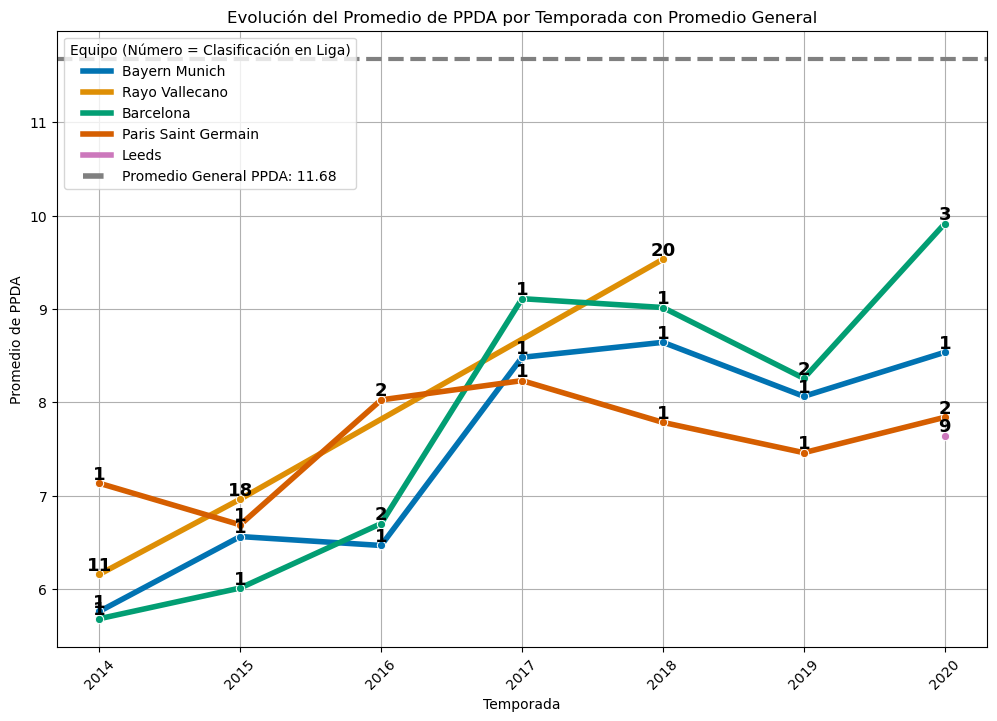

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear el gráfico de líneas para cada equipo con mayor grosor de línea
plt.figure(figsize=(12, 8))
sns.set_palette("colorblind")
lineplot = sns.lineplot(data=avg_ppda_per_season, x='season', y='ppda', hue='name', marker='o', linewidth=4)

# Calcular el promedio general del PPDA y añadir una línea discontinua en ese nivel
average_ppda = avg_ppda_per_team['ppda'].mean()
plt.axhline(average_ppda, color='gray', linestyle='--', linewidth=3, label=f'Promedio General PPDA: {average_ppda:.2f}')

# Añadir los números de la clasificación sobre los puntos correspondientes
for i, row in avg_ppda_per_season.iterrows():
    plt.text(x=row['season'], y=row['ppda'], s=row['league_position'], 
             color='black', ha='center', va='bottom', fontsize=13, fontweight='bold')

# Configuraciones adicionales del gráfico
plt.title('Evolución del Promedio de PPDA por Temporada con Promedio General')
plt.xlabel('Temporada')
plt.ylabel('Promedio de PPDA')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title='Equipo (Número = Clasificación en Liga)', loc='upper left')

# Aumentar el grosor de las líneas en la leyenda
for line in lineplot.legend_.get_lines():
    line.set_linewidth(4)

# Mostrar el gráfico
plt.show()



### 4- 5 Equipos con el PPDA más alto

In [44]:
# Ordenar los equipos por promedio de PPDA en orden ascendente para obtener los más altos
top_5_teams_ppda_high = avg_ppda_per_team.sort_values('ppda', ascending=False).head(5)

print(top_5_teams_ppda_high)

     teamID       ppda                 name
134     234  20.304276            Nuernberg
144     261  18.545992                Cadiz
127     227  18.462976              Cardiff
133     233  17.047296  Fortuna Duesseldorf
141     243  16.840955                Lecce


In [45]:
# Obtener los equipos con los PPDA más altos
top_5_teams_ids_high = top_5_teams_ppda_high['teamID'].tolist()

# Filtrar los datos de teamstats para esos equipos y calcular el promedio de PPDA por temporada
avg_ppda_per_season_high = teamstats[teamstats['teamID'].isin(top_5_teams_ids_high)].groupby(['teamID', 'season'])['ppda'].mean().reset_index()

# Obtener los nombres de los equipos
avg_ppda_per_season_high = avg_ppda_per_season_high.merge(teams[['teamID', 'name']], on='teamID')

# Mostrar los resultados
print(avg_ppda_per_season_high)

   teamID  season       ppda                 name
0     227    2018  18.462976              Cardiff
1     233    2018  17.284159  Fortuna Duesseldorf
2     233    2019  16.810432  Fortuna Duesseldorf
3     234    2018  20.304276            Nuernberg
4     243    2019  16.840955                Lecce
5     261    2020  18.545992                Cadiz


##  Relación entre los puntos obtenidos con el XG Delta y el PPDA promedio de los equipos
La puntuación obtenida en una liga es una métrica directa y tangible del rendimiento de un equipo a lo largo de una temporada. Refleja no solo la consistencia y capacidad del equipo para ganar partidos, sino también su eficiencia en traducir oportunidades en resultados. Por lo tanto, la puntuación es una medida integral que permite evaluar el éxito competitivo de un equipo.
### 1- Relación entre Puntos Obtenidos y xG Delta Promedio
Para analizar la relación entre los puntos obtenidos y el xG Delta promedio de los equipos, se recopilaron datos de todas las ligas y temporadas del dataset. Primero, se calcularon los puntos totales obtenidos por cada equipo en una temporada, así como su xG Delta promedio. Luego, se combinó esta información para evaluar cómo el xG Delta influye en el rendimiento, medido en puntos obtenidos.

In [46]:
import numpy as np
import pandas as pd

def calculate_points_and_xg_delta(games, teamstats, teams, league_ids, seasons):
    # Lista para almacenar los resultados
    results = []

    # Recorrer cada liga y temporada
    for league_id in league_ids:
        for season in seasons:
            # Filtrar los partidos de la liga y temporada actual
            league_games = games[(games['leagueID'] == league_id) & (games['season'] == season)]

            # Crear un DataFrame para los puntos por equipo en cada partido
            home_points = league_games[['homeTeamID', 'homeGoals', 'awayGoals']].copy()
            home_points['points'] = home_points.apply(lambda row: 3 if row['homeGoals'] > row['awayGoals'] else 1 if row['homeGoals'] == row['awayGoals'] else 0, axis=1)
            home_points.rename(columns={'homeTeamID': 'teamID'}, inplace=True)

            away_points = league_games[['awayTeamID', 'homeGoals', 'awayGoals']].copy()
            away_points['points'] = away_points.apply(lambda row: 3 if row['awayGoals'] > row['homeGoals'] else 1 if row['awayGoals'] == row['homeGoals'] else 0, axis=1)
            away_points.rename(columns={'awayTeamID': 'teamID'}, inplace=True)

            # Combinar los puntos de los equipos locales y visitantes
            points_per_team = pd.concat([home_points[['teamID', 'points']], away_points[['teamID', 'points']]])

            # Calcular los puntos totales por equipo en la temporada
            total_points_per_team = points_per_team.groupby('teamID')['points'].sum().reset_index()

            # Filtrar los datos del equipo para la temporada actual de la liga
            teamstats_season = teamstats[(teamstats['season'] == season) & (teamstats['location'] == 'h')]

            # Calcular el xG Delta para cada equipo
            teamstats_season['xg_delta'] = teamstats_season['goals'] - teamstats_season['xGoals']

            # Calcular el xG Delta promedio por equipo en la temporada
            xg_delta_per_team = teamstats_season.groupby('teamID')['xg_delta'].mean().reset_index()

            # Combinar con los nombres de los equipos
            xg_delta_per_team = xg_delta_per_team.merge(teams[['teamID', 'name']], on='teamID', how='left')

            # Combinar la posición de la clasificación con el xG Delta
            classification_xg_delta = pd.merge(total_points_per_team[['teamID', 'points']],
                                               xg_delta_per_team[['teamID', 'xg_delta']],
                                               on='teamID', how='left')

            # Añadir los resultados a la lista
            for _, row in classification_xg_delta.iterrows():
                results.append([row['points'], row['xg_delta']])

    # Convertir los resultados a una matriz numpy
    results_matrix = np.array(results)

    return results_matrix

# Usar
league_ids = [1, 2, 3, 4, 5]  # IDs de las ligas 
seasons = [2014, 2015, 2016, 2017, 2018, 2019, 2020]  # Temporadas para analizar

points_xg_delta_matrix = calculate_points_and_xg_delta(games, teamstats, teams, league_ids, seasons)
print(points_xg_delta_matrix)


C:\Users\soler\AppData\Local\Temp\ipykernel_16812\2945963301.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teamstats_season['xg_delta'] = teamstats_season['goals'] - teamstats_season['xGoals']
C:\Users\soler\AppData\Local\Temp\ipykernel_16812\2945963301.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teamstats_season['xg_delta'] = teamstats_season['goals'] - teamstats_season['xGoals']
C:\Users\soler\AppData\Local\Temp\ipykernel_16812\2945963301.py:33: SettingWithCopyWarning: 
A value is trying t

[[ 3.80000000e+01 -4.73971053e-02]
 [ 4.70000000e+01  3.91897895e-02]
 [ 6.00000000e+01  1.20989368e-01]
 ...
 [ 4.20000000e+01 -2.68129158e-01]
 [ 3.50000000e+01  8.46905789e-02]
 [ 4.10000000e+01  2.33592895e-01]]


C:\Users\soler\AppData\Local\Temp\ipykernel_16812\2945963301.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teamstats_season['xg_delta'] = teamstats_season['goals'] - teamstats_season['xGoals']
C:\Users\soler\AppData\Local\Temp\ipykernel_16812\2945963301.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teamstats_season['xg_delta'] = teamstats_season['goals'] - teamstats_season['xGoals']
C:\Users\soler\AppData\Local\Temp\ipykernel_16812\2945963301.py:33: SettingWithCopyWarning: 
A value is trying t

In [47]:
points_xg_delta_matrix

array([[ 3.80000000e+01, -4.73971053e-02],
       [ 4.70000000e+01,  3.91897895e-02],
       [ 6.00000000e+01,  1.20989368e-01],
       ...,
       [ 4.20000000e+01, -2.68129158e-01],
       [ 3.50000000e+01,  8.46905789e-02],
       [ 4.10000000e+01,  2.33592895e-01]])

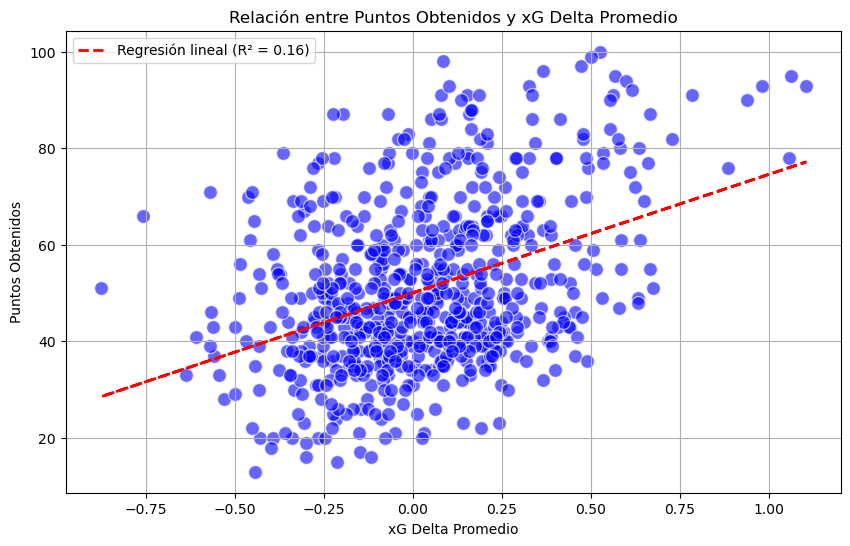

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Separar los puntos y xG Delta
points = points_xg_delta_matrix[:, 0]
xg_delta = points_xg_delta_matrix[:, 1]

# Calcular la regresión lineal
slope, intercept, r_value, p_value, std_err = linregress(xg_delta, points)

# Crear la línea de regresión
regression_line = slope * xg_delta + intercept

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(xg_delta, points, color='blue', alpha=0.6, edgecolor='w', s=100)

# Añadir la línea de regresión
plt.plot(xg_delta, regression_line, color='red', linestyle='--', linewidth=2, label=f'Regresión lineal (R² = {r_value**2:.2f})')

# Etiquetas y título
plt.xlabel('xG Delta Promedio')
plt.ylabel('Puntos Obtenidos')
plt.title('Relación entre Puntos Obtenidos y xG Delta Promedio')
plt.grid(True)
plt.legend()

# Mostrar el gráfico
plt.show()


### 2- Relación entre Puntos Obtenidos y PPDA Promedio

El modus operandi para analizar la relación entre los puntos obtenidos y el PPDA promedio sigue el mismo enfoque que en el caso del xG Delta. Se recopilaron los datos de todas las ligas y temporadasvdel dataset, calculando tanto los puntos totales obtenidos por cada equipo en una temporada como su PPDA promedio. Esta información se combinó para evaluar cómo el PPDA, que mide la intensidad defensiva de un equipo, influye en su rendimiento en términos de puntos obtenidos.

In [49]:
import numpy as np

def calculate_points_and_ppda(games, teamstats, teams, league_ids, seasons):
    # Crear una lista para almacenar los resultados
    points_ppda_matrix = []

    # Recorrer cada liga y temporada
    for league_id in league_ids:
        for season in seasons:
            # Filtrar los partidos de la liga y temporada actuales
            league_season_games = games[(games['leagueID'] == league_id) & (games['season'] == season)]
            
            # Crear un DataFrame para los puntos por equipo en cada partido
            home_points = league_season_games[['homeTeamID', 'homeGoals', 'awayGoals']].copy()
            home_points['points'] = home_points.apply(lambda row: 3 if row['homeGoals'] > row['awayGoals'] else 1 if row['homeGoals'] == row['awayGoals'] else 0, axis=1)
            home_points.rename(columns={'homeTeamID': 'teamID'}, inplace=True)

            away_points = league_season_games[['awayTeamID', 'homeGoals', 'awayGoals']].copy()
            away_points['points'] = away_points.apply(lambda row: 3 if row['awayGoals'] > row['homeGoals'] else 1 if row['awayGoals'] == row['homeGoals'] else 0, axis=1)
            away_points.rename(columns={'awayTeamID': 'teamID'}, inplace=True)

            # Combinar los puntos de los equipos locales y visitantes
            points_per_team = pd.concat([home_points[['teamID', 'points']], away_points[['teamID', 'points']]])

            # Calcular los puntos totales por equipo en la temporada actual
            total_points_per_team = points_per_team.groupby('teamID')['points'].sum().reset_index()

            # Filtrar los datos del equipo para la temporada actual
            teamstats_season = teamstats[(teamstats['season'] == season)]

            # Calcular el PPDA promedio por equipo en la temporada
            ppda_per_team = teamstats_season.groupby('teamID')['ppda'].mean().reset_index()

            # Combinar los puntos totales con el PPDA
            points_ppda = pd.merge(total_points_per_team, ppda_per_team, on='teamID', how='inner')

            # Añadir los resultados a la matriz
            points_ppda_matrix.extend(points_ppda[['points', 'ppda']].values)

    # Convertir la lista de resultados a una matriz NumPy
    points_ppda_matrix = np.array(points_ppda_matrix)
    
    return points_ppda_matrix

# Ejemplo de uso
league_ids = [1, 2, 3, 4, 5]  # IDs de las ligas (La Liga, Premier League, Bundesliga, Serie A, Ligue 1)
seasons = [2014, 2015, 2016, 2017, 2018, 2019, 2020]  # Temporadas de interés

# Calcular la matriz de puntos y PPDA
points_ppda_matrix = calculate_points_and_ppda(games, teamstats, teams, league_ids, seasons)


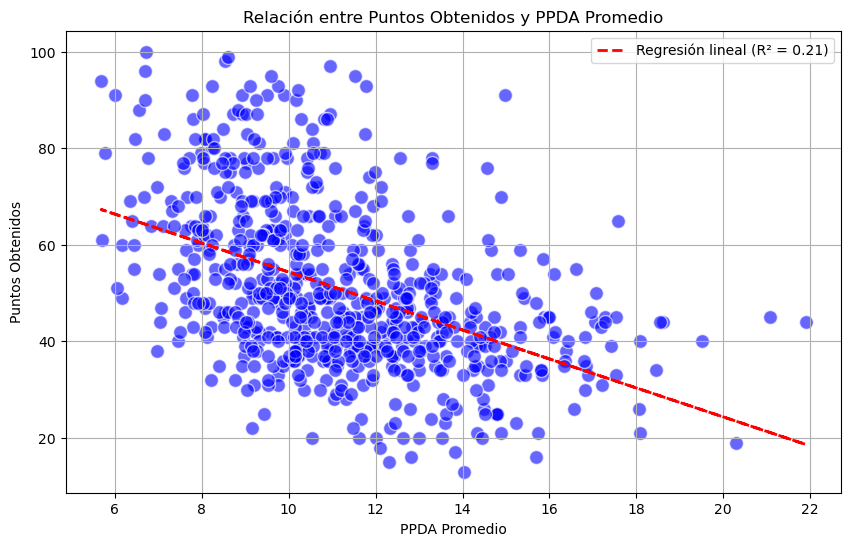

In [50]:
# Separar los puntos y PPDA
points = points_ppda_matrix[:, 0]
ppda = points_ppda_matrix[:, 1]

# Calcular la regresión lineal
slope, intercept, r_value, p_value, std_err = linregress(ppda, points)

# Crear la línea de regresión
regression_line = slope * ppda + intercept

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(ppda, points, color='blue', alpha=0.6, edgecolor='w', s=100)

# Añadir la línea de regresión
plt.plot(ppda, regression_line, color='red', linestyle='--', linewidth=2, label=f'Regresión lineal (R² = {r_value**2:.2f})')

# Etiquetas y título
plt.xlabel('PPDA Promedio')
plt.ylabel('Puntos Obtenidos')
plt.title('Relación entre Puntos Obtenidos y PPDA Promedio')
plt.grid(True)
plt.legend()

# Mostrar el gráfico
plt.show()


In [51]:
points_ppda_matrix

array([[38.        , 16.38689211],
       [47.        , 10.43277895],
       [60.        ,  9.25953947],
       ...,
       [42.        , 14.73159737],
       [35.        , 15.46117105],
       [41.        , 15.32867368]])

In [52]:
points_xg_delta_matrix

array([[ 3.80000000e+01, -4.73971053e-02],
       [ 4.70000000e+01,  3.91897895e-02],
       [ 6.00000000e+01,  1.20989368e-01],
       ...,
       [ 4.20000000e+01, -2.68129158e-01],
       [ 3.50000000e+01,  8.46905789e-02],
       [ 4.10000000e+01,  2.33592895e-01]])

### 3- Relación entre xG Delta, PPDA y Puntuación
En esta sección, se explora la relación entre las tres variables clave: xG Delta, PPDA y puntuación. Aprovechando los cálculos realizados en apartados anteriores, se llevó a cabo una regresión múltiple que examina cómo estas métricas, en conjunto, influyen en el rendimiento de los equipos en términos de puntos obtenidos.
	
Para la representación, se optó por una visualización en dos dimensiones donde se graficaron los puntos obtenidos en el eje X y el xG Delta en el eje Y. La tercera dimensión, el PPDA, se representó mediante burbujas de tamaño variable según su valor. Además, se utilizó una escala de color con la paleta bwr: las burbujas más grandes y de color rojizo corresponden a valores altos de PPDA, mientras que las burbujas más pequeñas y azuladas indican valores bajos.

In [53]:
import numpy as np

def calculate_combined_metrics(games, teamstats, league_ids, seasons):
    combined_matrix = []

    for league_id in league_ids:
        for season in seasons:
            # Filtrar los partidos de la liga y temporada actuales
            league_season_games = games[(games['leagueID'] == league_id) & (games['season'] == season)]
            
            # Crear un DataFrame para los puntos por equipo en cada partido
            home_points = league_season_games[['homeTeamID', 'homeGoals', 'awayGoals']].copy()
            home_points['points'] = home_points.apply(lambda row: 3 if row['homeGoals'] > row['awayGoals'] else 1 if row['homeGoals'] == row['awayGoals'] else 0, axis=1)
            home_points.rename(columns={'homeTeamID': 'teamID'}, inplace=True)

            away_points = league_season_games[['awayTeamID', 'homeGoals', 'awayGoals']].copy()
            away_points['points'] = away_points.apply(lambda row: 3 if row['awayGoals'] > row['homeGoals'] else 1 if row['awayGoals'] == row['homeGoals'] else 0, axis=1)
            away_points.rename(columns={'awayTeamID': 'teamID'}, inplace=True)

            # Combinar los puntos de los equipos locales y visitantes
            points_per_team = pd.concat([home_points[['teamID', 'points']], away_points[['teamID', 'points']]])
            total_points_per_team = points_per_team.groupby('teamID')['points'].sum().reset_index()

            # Filtrar los datos del equipo para la temporada actual
            teamstats_season = teamstats[(teamstats['season'] == season)]

            # Calcular el xG Delta y PPDA promedio por equipo en la temporada
            teamstats_season['xg_delta'] = teamstats_season['goals'] - teamstats_season['xGoals']
            xg_delta_per_team = teamstats_season.groupby('teamID')['xg_delta'].mean().reset_index()
            ppda_per_team = teamstats_season.groupby('teamID')['ppda'].mean().reset_index()

            # Combinar los puntos totales con el xG Delta y PPDA
            combined_data = pd.merge(total_points_per_team, xg_delta_per_team, on='teamID', how='inner')
            combined_data = pd.merge(combined_data, ppda_per_team, on='teamID', how='inner')

            # Añadir los resultados a la matriz combinada
            combined_matrix.extend(combined_data[['points', 'xg_delta', 'ppda']].values)

    # Convertir la lista de resultados a una matriz NumPy
    combined_matrix = np.array(combined_matrix)
    
    return combined_matrix

# Ejemplo de uso
league_ids = [1, 2, 3, 4, 5]  # IDs de las ligas (La Liga, Premier League, Bundesliga, Serie A, Ligue 1)
seasons = [2014, 2015, 2016, 2017, 2018, 2019, 2020]  # Temporadas de interés

# Calcular la matriz combinada de puntos, xG Delta y PPDA
combined_metrics_matrix = calculate_combined_metrics(games, teamstats, league_ids, seasons)


C:\Users\soler\AppData\Local\Temp\ipykernel_16812\1304811187.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teamstats_season['xg_delta'] = teamstats_season['goals'] - teamstats_season['xGoals']
C:\Users\soler\AppData\Local\Temp\ipykernel_16812\1304811187.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teamstats_season['xg_delta'] = teamstats_season['goals'] - teamstats_season['xGoals']
C:\Users\soler\AppData\Local\Temp\ipykernel_16812\1304811187.py:28: SettingWithCopyWarning: 
A value is trying t

C:\Users\soler\AppData\Local\Temp\ipykernel_16812\1304811187.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teamstats_season['xg_delta'] = teamstats_season['goals'] - teamstats_season['xGoals']
C:\Users\soler\AppData\Local\Temp\ipykernel_16812\1304811187.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teamstats_season['xg_delta'] = teamstats_season['goals'] - teamstats_season['xGoals']
C:\Users\soler\AppData\Local\Temp\ipykernel_16812\1304811187.py:28: SettingWithCopyWarning: 
A value is trying t

In [54]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Extraer puntos, xG Delta y PPDA
points = combined_metrics_matrix[:, 0]
xg_delta = combined_metrics_matrix[:, 1]
ppda = combined_metrics_matrix[:, 2]

# Preparar los datos para la regresión múltiple (xG Delta y PPDA como predictores)
X = np.column_stack((xg_delta, ppda))
y = points

# Agregar una constante para el intercepto (usando statsmodels)
X = sm.add_constant(X)

# Ajustar el modelo de regresión múltiple
model = sm.OLS(y, X).fit()

# Mostrar el resumen de la regresión
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     227.4
Date:                Sun, 08 Sep 2024   Prob (F-statistic):           2.04e-76
Time:                        15:51:08   Log-Likelihood:                -2747.0
No. Observations:                 686   AIC:                             5500.
Df Residuals:                     683   BIC:                             5514.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         77.7008      2.254     34.479      0.0

C:\Users\soler\AppData\Local\Temp\ipykernel_16812\1565741982.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('bwr')


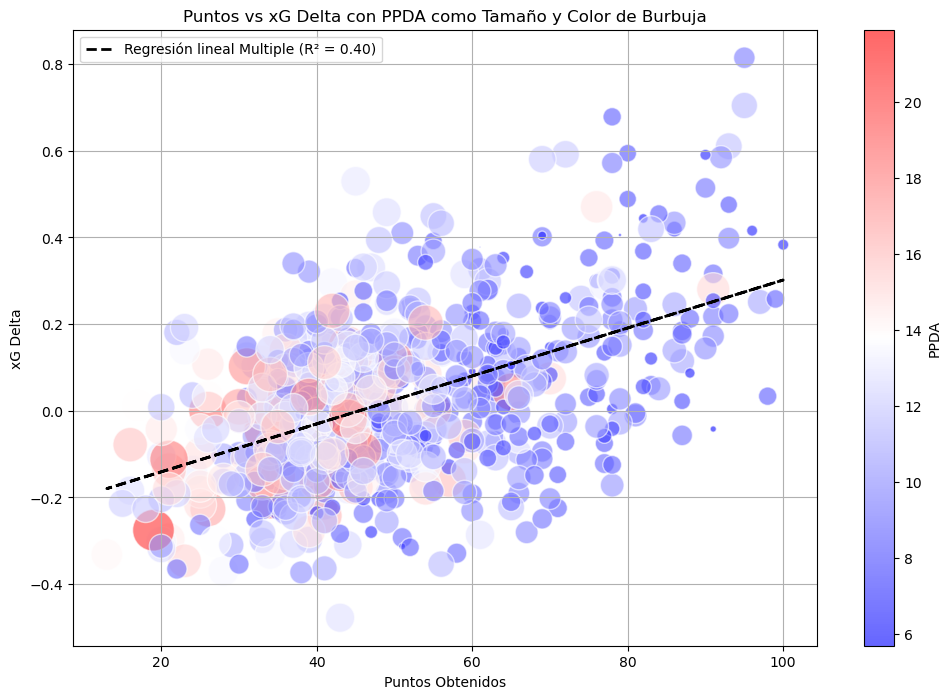

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.stats import linregress

# Crear el gráfico de burbujas
plt.figure(figsize=(12, 8))

# Normalizar el tamaño de las burbujas y los colores
bubble_size = (ppda - np.min(ppda)) / (np.max(ppda) - np.min(ppda)) * 1000

# Seleccionar un colormap
cmap = cm.get_cmap('bwr')

# Crear las burbujas con tamaño y color dependiendo del PPDA
scatter = plt.scatter(
    x=combined_metrics_matrix[:, 0],  # Puntos en el eje X
    y=combined_metrics_matrix[:, 1],  # xG Delta en el eje Y
    s=bubble_size,                   # Tamaño de las burbujas
    c=ppda,                        # Color de las burbujas
    cmap=cmap,                       # Colormap
    alpha=0.6, 
    edgecolor='w'
)

# Calcular la regresión lineal entre puntos y xG Delta
slope, intercept, r_value, p_value, std_err = linregress(combined_metrics_matrix[:, 0], combined_metrics_matrix[:, 1])

# Crear la línea de regresión
regression_line = slope * combined_metrics_matrix[:, 0] + intercept

# Dibujar la línea de regresión
plt.plot(combined_metrics_matrix[:, 0], regression_line, color='black', linestyle='--', linewidth=2, label=f'Regresión lineal Multiple (R² = 0.40)')

# Añadir barra de color (colorbar) para mostrar la escala de PPDA
cbar = plt.colorbar(scatter, label='PPDA')
cbar.set_label('PPDA')

# Configuraciones adicionales del gráfico
plt.title('Puntos vs xG Delta con PPDA como Tamaño y Color de Burbuja')
plt.xlabel('Puntos Obtenidos')
plt.ylabel('xG Delta')
plt.grid(True)
plt.legend()

# Mostrar el gráfico
plt.show()


# Visualización
En esta sección, se utilizará un método de agrupación y promediación para reducir la varianza y dispersión en los datos, con el fin de obtener una visualización más clara y accesible de la relación entre las métricas xG Delta, PPDA, y la posición en la clasificación de los equipos.
## Método de Agrupación y Promediación
El enfoque descrito consiste en agrupar a los equipos de diferentes ligas y temporadas según su posición final en la clasificación, es decir, se crean estratos donde se agrupan todos los equipos que terminaron en la misma posición (primeros, segundos, etc.). Una vez agrupados, se calcula el promedio de las métricas de xG Delta y PPDA para cada uno de estos grupos. Este método permite disminuir la varianza y la dispersión de los datos, facilitando una interpretación más directa y comprensible.
## Objetivo de la Visualización
El objetivo de este enfoque es generar tres visualizaciones que se basen en las posiciones en la liga como métrica principal, en lugar de analizar cada equipo individualmente. Este método permitirá una representación visual más clara y menos ruidosa de cómo las métricas xG Delta y PPDA influyen en el rendimiento de los equipos. Estas visualizaciones serán comparadas con las anteriores, mostrando de manera más sencilla y didáctica cómo las posiciones en la liga se relacionan con el rendimiento según las métricas estudiadas.
	
Al agrupar por posiciones y promediar las métricas, la visualización resultante ofrece una herramienta poderosa para explicar, incluso a personas no especializadas, las conclusiones extraídas de los análisis anteriores. Específicamente, se mostrará cómo la combinación de xG Delta y PPDA se correlaciona con el éxito o fracaso de los equipos, permitiendo así una comprensión más profunda y accesible de su impacto en el rendimiento en la liga.

## Análisis Comparativo: Posición vs. xG Delta Promedio y Posición vs. PPDA Promedio
En este apartado, se analizan conjuntamente las visualizaciones resultantes de las gráficas de Posición vs. xG Delta Promedio y Posición vs. PPDA Promedio. Estas visualizaciones han sido diseñadas con un enfoque estilístico y cromático específico para facilitar la interpretación de los datos y destacar las tendencias clave que emergen al aplicar la técnica de promediación por posiciones en la liga.

In [56]:
# Unir teamstats con games para obtener la columna 'leagueID'
teamstats_with_league = pd.merge(teamstats, games[['gameID', 'leagueID']], on='gameID', how='left')

# Verificar si ahora está la columna 'leagueID'
print(teamstats_with_league.columns)


Index(['gameID', 'teamID', 'season', 'date', 'location', 'goals', 'xGoals',
       'shots', 'shotsOnTarget', 'deep', 'ppda', 'fouls', 'corners',
       'yellowCards', 'redCards', 'result', 'xg_delta', 'leagueID'],
      dtype='object')


In [57]:
def calculate_xg_ppda_position_matrix(games, teamstats_with_league, teams, league_ids, seasons):
    data = []

    for league_id in league_ids:
        for season in seasons:
            # Filtrar los partidos para la liga y temporada específica
            league_games = games[(games['leagueID'] == league_id) & (games['season'] == season)]
            
            # Calcular los puntos para cada equipo
            home_points = league_games[['homeTeamID', 'homeGoals', 'awayGoals']].copy()
            home_points['points'] = home_points.apply(lambda row: 3 if row['homeGoals'] > row['awayGoals'] else 1 if row['homeGoals'] == row['awayGoals'] else 0, axis=1)
            home_points.rename(columns={'homeTeamID': 'teamID'}, inplace=True)

            away_points = league_games[['awayTeamID', 'homeGoals', 'awayGoals']].copy()
            away_points['points'] = away_points.apply(lambda row: 3 if row['awayGoals'] > row['homeGoals'] else 1 if row['awayGoals'] == row['homeGoals'] else 0, axis=1)
            away_points.rename(columns={'awayTeamID': 'teamID'}, inplace=True)

            # Combinar los puntos de los equipos locales y visitantes
            points_per_team = pd.concat([home_points[['teamID', 'points']], away_points[['teamID', 'points']]])
            total_points_per_team = points_per_team.groupby('teamID')['points'].sum().reset_index()

            # Calcular la clasificación de los equipos en esa temporada
            total_points_per_team['position'] = total_points_per_team['points'].rank(ascending=False, method='first').astype(int)

            # Filtrar los datos de teamstats_with_league para la temporada actual y la liga específica
            teamstats_season = teamstats_with_league[(teamstats_with_league['season'] == season) & (teamstats_with_league['leagueID'] == league_id)]

            # Calcular el xG Delta y PPDA promedio por equipo
            teamstats_season['xg_delta'] = teamstats_season['goals'] - teamstats_season['xGoals']
            metrics_per_team = teamstats_season.groupby('teamID').agg(
                xg_delta=('xg_delta', 'mean'),
                ppda=('ppda', 'mean')
            ).reset_index()

            # Combinar con los puntos y posiciones para obtener la clasificación
            combined_metrics = pd.merge(total_points_per_team, metrics_per_team, on='teamID')

            # Agregar los resultados a la lista
            for _, row in combined_metrics.iterrows():
                data.append([row['xg_delta'], row['ppda'], row['position']])

    # Convertir la lista en una matriz de numpy
    result_matrix = np.array(data)
    return result_matrix

# Definir los IDs de las ligas y las temporadas de interés
league_ids = [1, 2, 3, 4, 5]  # Lista de IDs de ligas relevantes
seasons = [2014, 2015, 2016, 2017, 2018, 2019, 2020]  # Temporadas de interés

# Calcular la matriz con xG Delta, PPDA y clasificación
xg_ppda_position_matrix = calculate_xg_ppda_position_matrix(games, teamstats_with_league, teams, league_ids, seasons)

# Mostrar la matriz resultante
print(xg_ppda_position_matrix)



C:\Users\soler\AppData\Local\Temp\ipykernel_16812\289825847.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teamstats_season['xg_delta'] = teamstats_season['goals'] - teamstats_season['xGoals']
C:\Users\soler\AppData\Local\Temp\ipykernel_16812\289825847.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teamstats_season['xg_delta'] = teamstats_season['goals'] - teamstats_season['xGoals']
C:\Users\soler\AppData\Local\Temp\ipykernel_16812\289825847.py:29: SettingWithCopyWarning: 
A value is trying to b

C:\Users\soler\AppData\Local\Temp\ipykernel_16812\289825847.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teamstats_season['xg_delta'] = teamstats_season['goals'] - teamstats_season['xGoals']
C:\Users\soler\AppData\Local\Temp\ipykernel_16812\289825847.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teamstats_season['xg_delta'] = teamstats_season['goals'] - teamstats_season['xGoals']
C:\Users\soler\AppData\Local\Temp\ipykernel_16812\289825847.py:29: SettingWithCopyWarning: 
A value is trying to b

[[-0.05533345 16.38689211 16.        ]
 [ 0.08188987 10.43277895 11.        ]
 [-0.02541229  9.25953947  7.        ]
 ...
 [-0.09944447 14.73159737 16.        ]
 [-0.03666374 15.46117105 19.        ]
 [ 0.11129372 15.32867368 17.        ]]


C:\Users\soler\AppData\Local\Temp\ipykernel_16812\289825847.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teamstats_season['xg_delta'] = teamstats_season['goals'] - teamstats_season['xGoals']
C:\Users\soler\AppData\Local\Temp\ipykernel_16812\289825847.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teamstats_season['xg_delta'] = teamstats_season['goals'] - teamstats_season['xGoals']


In [58]:
import pandas as pd
import numpy as np

# Convertir la matriz a un DataFrame para facilitar la agrupación y cálculo de promedios
xg_ppda_position_df = pd.DataFrame(xg_ppda_position_matrix, columns=['xg_delta', 'ppda', 'position'])

# Agrupar por posición y calcular los promedios de xG Delta y PPDA
avg_metrics_per_position = xg_ppda_position_df.groupby('position').agg(
    avg_xg_delta=('xg_delta', 'mean'),
    avg_ppda=('ppda', 'mean')
).reset_index()

# Mostrar los resultados
print(avg_metrics_per_position)


    position  avg_xg_delta   avg_ppda
0        1.0      0.266362   8.890494
1        2.0      0.214380   9.484175
2        3.0      0.080705   9.326712
3        4.0      0.129178   9.330644
4        5.0      0.094731   9.999023
5        6.0      0.059523  10.432695
6        7.0     -0.026912  10.697839
7        8.0      0.067977  10.431007
8        9.0      0.009807  11.222912
9       10.0      0.050899  11.798290
10      11.0      0.004095  10.944811
11      12.0     -0.015258  11.948217
12      13.0      0.025790  12.728161
13      14.0      0.003975  12.270407
14      15.0      0.004107  11.844409
15      16.0     -0.065922  12.240586
16      17.0     -0.048343  12.212210
17      18.0     -0.070563  12.977914
18      19.0     -0.072076  12.809786
19      20.0     -0.181035  12.554432


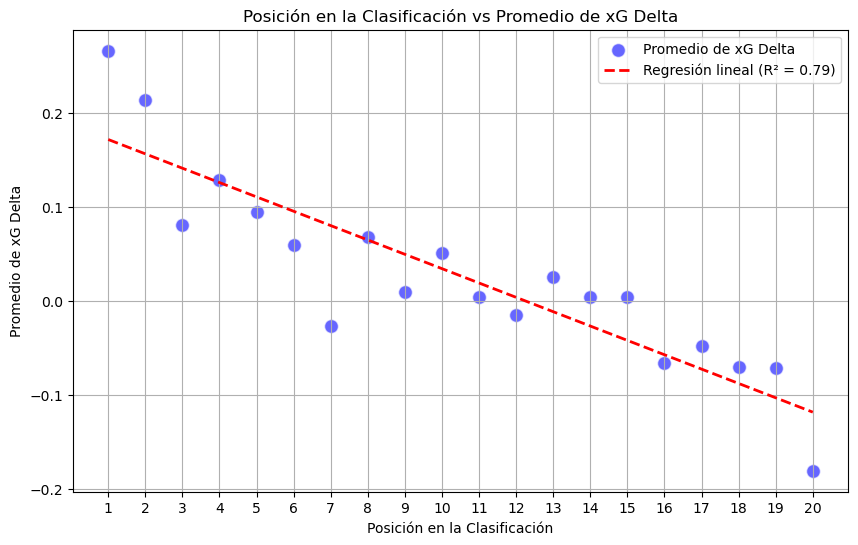

In [59]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Extraer los valores de posición y el promedio de xG Delta
positions = avg_metrics_per_position['position']
avg_xg_delta = avg_metrics_per_position['avg_xg_delta']

# Realizar el análisis de regresión lineal
slope, intercept, r_value, p_value, std_err = linregress(positions, avg_xg_delta)

# Crear la línea de regresión
regression_line = slope * positions + intercept

# Crear el gráfico de dispersión y la línea de regresión
plt.figure(figsize=(10, 6))
plt.scatter(positions, avg_xg_delta, color='blue', label='Promedio de xG Delta', alpha=0.6, edgecolor='w', s=100)
plt.plot(positions, regression_line, color='red', linestyle='--', linewidth=2, label=f'Regresión lineal (R² = {r_value**2:.2f})')

# Configuraciones adicionales del gráfico
plt.title('Posición en la Clasificación vs Promedio de xG Delta')
plt.xlabel('Posición en la Clasificación')
plt.ylabel('Promedio de xG Delta')
plt.grid(True)
plt.xticks(positions)  # Mostrar todas las posiciones en el eje x
plt.legend()

# Mostrar el gráfico
plt.show()


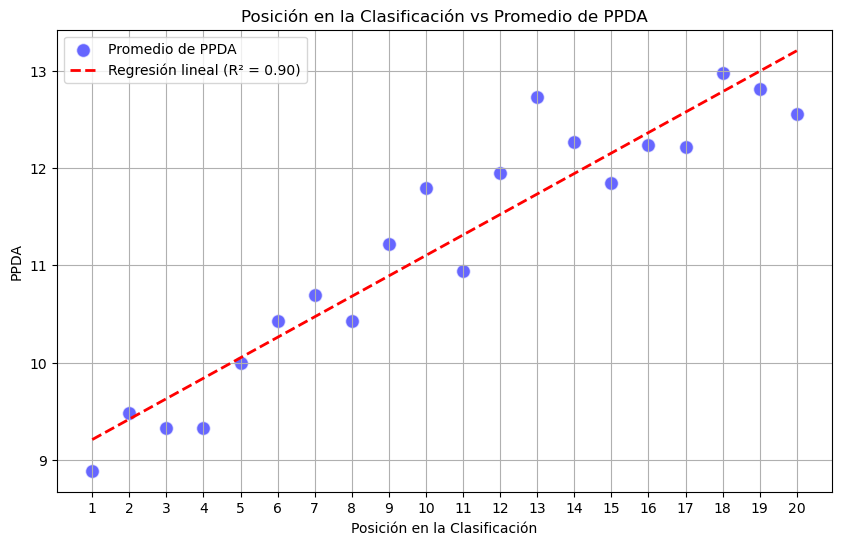

In [60]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Extraer los valores de posición y el promedio de xG Delta
positions = avg_metrics_per_position['position']
ppda_values = avg_metrics_per_position['avg_ppda']

# Realizar el análisis de regresión lineal
slope, intercept, r_value, p_value, std_err = linregress(positions, ppda_values)

# Crear la línea de regresión
regression_line = slope * positions + intercept

# Crear el gráfico de dispersión y la línea de regresión
plt.figure(figsize=(10, 6))
plt.scatter(positions, ppda_values, color='blue', label='Promedio de PPDA', alpha=0.6, edgecolor='w', s=100)
plt.plot(positions, regression_line, color='red', linestyle='--', linewidth=2, label=f'Regresión lineal (R² = {r_value**2:.2f})')

# Configuraciones adicionales del gráfico
plt.title('Posición en la Clasificación vs Promedio de PPDA')
plt.xlabel('Posición en la Clasificación')
plt.ylabel('PPDA')
plt.grid(True)
plt.xticks(positions)  # Mostrar todas las posiciones en el eje x
plt.legend()

# Mostrar el gráfico
plt.show()

In [61]:
import statsmodels.api as sm

# Definir las variables independientes (xG Delta y PPDA) y la variable dependiente (Posición)
X = avg_metrics_per_position[['avg_xg_delta', 'avg_ppda']].values  # xG Delta y PPDA
y = avg_metrics_per_position['position'].values  # Posición en la clasificación

# Añadir una constante a las variables independientes (para la intersección)
X = sm.add_constant(X)

# Ajustar el modelo de regresión múltiple
model = sm.OLS(y, X).fit()

# Obtener los resultados
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     111.5
Date:                Sun, 08 Sep 2024   Prob (F-statistic):           1.69e-10
Time:                        15:51:13   Log-Likelihood:                -36.945
No. Observations:                  20   AIC:                             79.89
Df Residuals:                      17   BIC:                             82.88
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -23.3393      6.067     -3.847      0.0

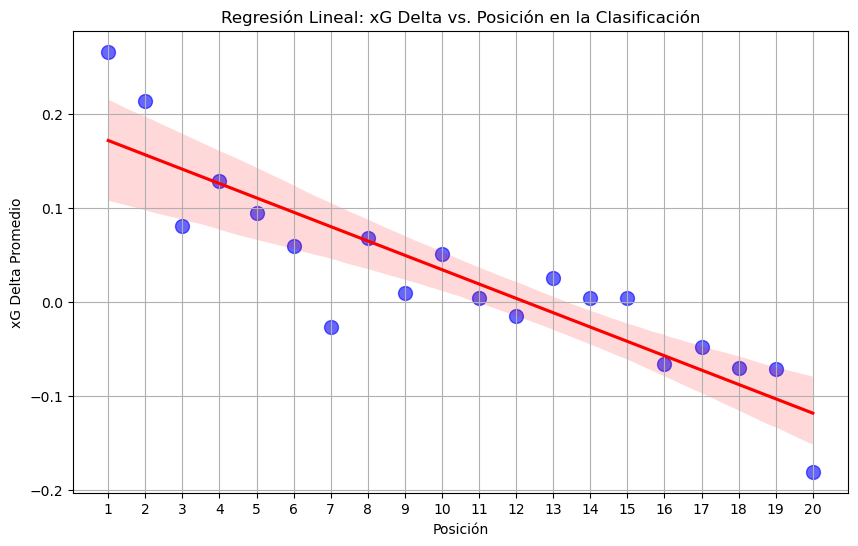

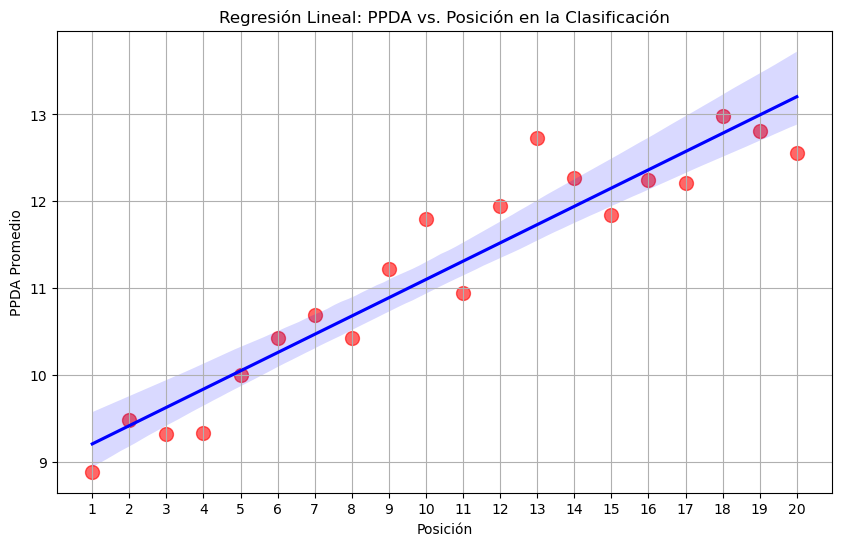

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir los colores para los puntos
color_xg_delta = 'blue'  # Color para los puntos de xG Delta
color_ppda = 'red'  # Color para los puntos de PPDA

# Gráfico de dispersión para xG Delta vs. Posición con línea de regresión
plt.figure(figsize=(10, 6))
sns.regplot(y='avg_xg_delta', x='position', data=avg_metrics_per_position, 
            scatter_kws={'s': 100, 'alpha': 0.6, 'color': color_xg_delta}, 
            line_kws={'color': 'red'})
plt.title('Regresión Lineal: xG Delta vs. Posición en la Clasificación')
plt.ylabel('xG Delta Promedio')
plt.xlabel('Posición')
plt.xticks(positions)
plt.grid(True)
plt.show()

# Gráfico de dispersión para PPDA vs. Posición con línea de regresión
plt.figure(figsize=(10, 6))
sns.regplot(y='avg_ppda', x='position', data=avg_metrics_per_position, 
            scatter_kws={'s': 100, 'alpha': 0.6, 'color': color_ppda}, 
            line_kws={'color': 'blue'})
plt.title('Regresión Lineal: PPDA vs. Posición en la Clasificación')
plt.ylabel('PPDA Promedio')
plt.xlabel('Posición')
plt.xticks(positions)
plt.grid(True)
plt.show()



## Representación Conjunta de Posición vs xG Delta vs PPDA
En este subapartado se presenta una visualización que integra las tres variables clave estudiadas: la posición en la clasificación, el xG Delta y el PPDA. La representación se estructura como un gráfico de burbujas.
- El eje X muestra las posiciones en la clasificación de los equipos.
- El eje Y representa el xG Delta promedio obtenido por los equipos.
- El tamaño y el color de las burbujas varían en función del PPDA promedio, donde burbujas más grandes y de color rojizo indican valores más altos de PPDA, y burbujas más pequeñas y de color azulado indican valores más bajos.

C:\Users\soler\AppData\Local\Temp\ipykernel_16812\2988027063.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('bwr')


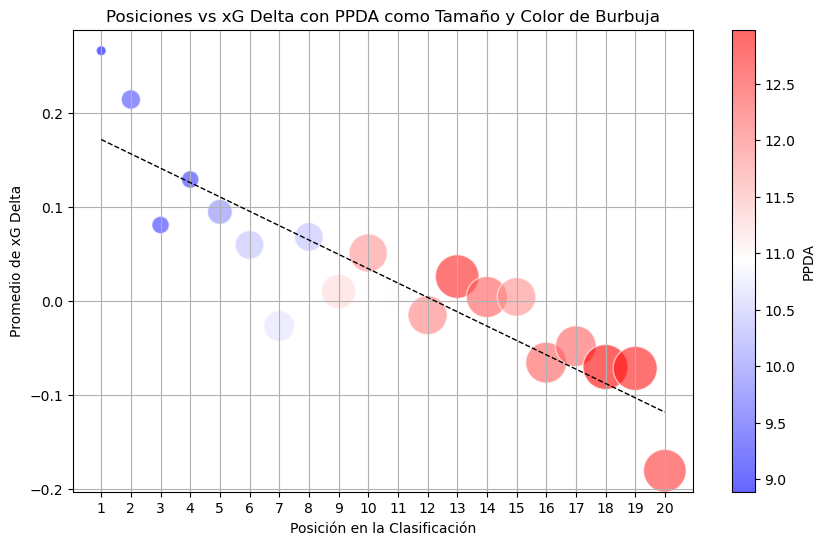

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from scipy.stats import linregress

# Datos: posiciones en el eje X, xG Delta en el eje Y, PPDA representado en el tamaño y color de las burbujas
positions = avg_metrics_per_position['position'].values
xg_delta = avg_metrics_per_position['avg_xg_delta'].values
ppda = avg_metrics_per_position['avg_ppda'].values

# Normalizar el tamaño de las burbujas y los colores
bubble_size = (ppda - np.min(ppda)) / (np.max(ppda) - np.min(ppda)) * 1000 + 50

# Seleccionar un colormap
cmap = cm.get_cmap('bwr')

# Crear el gráfico de burbujas
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    x=positions,          # Posiciones en el eje X
    y=xg_delta,           # xG Delta en el eje Y
    s=bubble_size,        # Tamaño de las burbujas
    c=ppda,               # Color de las burbujas según PPDA
    cmap=cmap,            # Colormap
    alpha=0.6, 
    edgecolor='w'
)

# Calcular la línea de regresión
slope, intercept, r_value, p_value, std_err = linregress(positions, xg_delta)
regression_line = slope * positions + intercept

# Añadir la línea de regresión
plt.plot(positions, regression_line, color='black', linestyle='--', linewidth=1, label=f'Regresión lineal (R² = {r_value**2:.2f})')

# Añadir barra de color (colorbar) para mostrar la escala de PPDA
cbar = plt.colorbar(scatter)
cbar.set_label('PPDA')

# Configuraciones adicionales del gráfico
plt.title('Posiciones vs xG Delta con PPDA como Tamaño y Color de Burbuja')
plt.xlabel('Posición en la Clasificación')
plt.ylabel('Promedio de xG Delta')
plt.grid(True)
plt.xticks(np.arange(1, max(positions) + 1, step=1))  # Mostrar todas las posiciones en el eje X
#plt.legend()

# Mostrar el gráfico
plt.show()


# Conclusiones
El apartado de conclusiones vendrá desarrollado en el árticulo correspondiente al estudio